In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [437]:
file = 'data.csv'
df = pd.read_csv(file, delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [438]:
# Создание словаря с переводами колонок
translations = {
    'Marital status': 'Семейное положение',
    'Application mode': 'Режим подачи заявки',
    'Application order': 'Порядок подачи заявки',
    'Course': 'Направление',
    'Daytime/evening attendance\t': 'Дневная/вечерняя форма обучения',
    'Previous qualification': 'Предыдущее образование',
    'Previous qualification (grade)': 'Предыдущее образование (оценка)',
    'Nacionality': 'Национальность',
    "Mother's qualification": 'Образование матери',
    "Father's qualification": 'Образование отца',
    "Mother's occupation": 'Профессия матери',
    "Father's occupation": 'Профессия отца',
    'Admission grade': 'Вступительный балл',
    'Displaced': 'Перемещенный',
    'Educational special needs': 'Образовательные специальные потребности',
    'Debtor': 'Должник',
    'Tuition fees up to date': 'Платежи за обучение актуальны',
    'Gender': 'Пол',
    'Scholarship holder': 'Получатель стипендии',
    'Age at enrollment': 'Возраст при зачислении',
    'International': 'Международный статус',
    'Curricular units 1st sem (credited)': 'Учебные единицы 1-го семестра (зачтенные)',
    'Curricular units 1st sem (enrolled)': 'Учебные единицы 1-го семестра (зачисленные)',
    'Curricular units 1st sem (evaluations)': 'Учебные единицы 1-го семестра (оценки)',
    'Curricular units 1st sem (approved)': 'Учебные единицы 1-го семестра (утвержденные)',
    'Curricular units 1st sem (grade)': 'Учебные единицы 1-го семестра (оценка)',
    'Curricular units 1st sem (without evaluations)': 'Учебные единицы 1-го семестра (без оценок)',
    'Curricular units 2nd sem (credited)': 'Учебные единицы 2-го семестра (зачтенные)',
    'Curricular units 2nd sem (enrolled)': 'Учебные единицы 2-го семестра (зачисленные)',
    'Curricular units 2nd sem (evaluations)': 'Учебные единицы 2-го семестра (оценки)',
    'Curricular units 2nd sem (approved)': 'Учебные единицы 2-го семестра (утвержденные)',
    'Curricular units 2nd sem (grade)': 'Учебные единицы 2-го семестра (оценка)',
    'Curricular units 2nd sem (without evaluations)': 'Учебные единицы 2-го семестра (без оценок)',
    'Unemployment rate': 'Уровень безработицы',
    'Inflation rate': 'Уровень инфляции',
    'GDP': 'ВВП',
    'Target': 'Цель'
}

# Переименование колонок в DataFrame
df.rename(columns=translations, inplace=True)

# Проверка обновленных названий колонок
df.columns

Index(['Семейное положение', 'Режим подачи заявки', 'Порядок подачи заявки',
       'Направление', 'Дневная/вечерняя форма обучения',
       'Предыдущее образование', 'Предыдущее образование (оценка)',
       'Национальность', 'Образование матери', 'Образование отца',
       'Профессия матери', 'Профессия отца', 'Вступительный балл',
       'Перемещенный', 'Образовательные специальные потребности', 'Должник',
       'Платежи за обучение актуальны', 'Пол', 'Получатель стипендии',
       'Возраст при зачислении', 'Международный статус',
       'Учебные единицы 1-го семестра (зачтенные)',
       'Учебные единицы 1-го семестра (зачисленные)',
       'Учебные единицы 1-го семестра (оценки)',
       'Учебные единицы 1-го семестра (утвержденные)',
       'Учебные единицы 1-го семестра (оценка)',
       'Учебные единицы 1-го семестра (без оценок)',
       'Учебные единицы 2-го семестра (зачтенные)',
       'Учебные единицы 2-го семестра (зачисленные)',
       'Учебные единицы 2-го семестра (оц

In [439]:
# Создание нового DataFrame
# Список нужных колонок
needed_columns = [
    'Режим подачи заявки',
    'Порядок подачи заявки',
    'Направление',
    'Дневная/вечерняя форма обучения',
    'Предыдущее образование',
    'Предыдущее образование (оценка)',
    'Вступительный балл',
    'Перемещенный',
    'Образовательные специальные потребности',
    'Пол',
    'Возраст при зачислении',
    'Получатель стипендии',
    'Международный статус',
    'Уровень безработицы',
    'Уровень инфляции',
    'ВВП'
]

# Создание нового DataFrame с выбранными колонками
new_df = df[needed_columns]

output_file_path = 'new_data.csv'
new_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')


In [440]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Режим подачи заявки                      4424 non-null   int64  
 1   Порядок подачи заявки                    4424 non-null   int64  
 2   Направление                              4424 non-null   int64  
 3   Дневная/вечерняя форма обучения          4424 non-null   int64  
 4   Предыдущее образование                   4424 non-null   int64  
 5   Предыдущее образование (оценка)          4424 non-null   float64
 6   Вступительный балл                       4424 non-null   float64
 7   Перемещенный                             4424 non-null   int64  
 8   Образовательные специальные потребности  4424 non-null   int64  
 9   Пол                                      4424 non-null   int64  
 10  Возраст при зачислении                   4424 no

In [441]:
new_df['Направление_код'], unique = pd.factorize(df['Направление'])


C:\Users\1645295\AppData\Local\Temp\ipykernel_4180\4180637307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Направление_код'], unique = pd.factorize(df['Направление'])


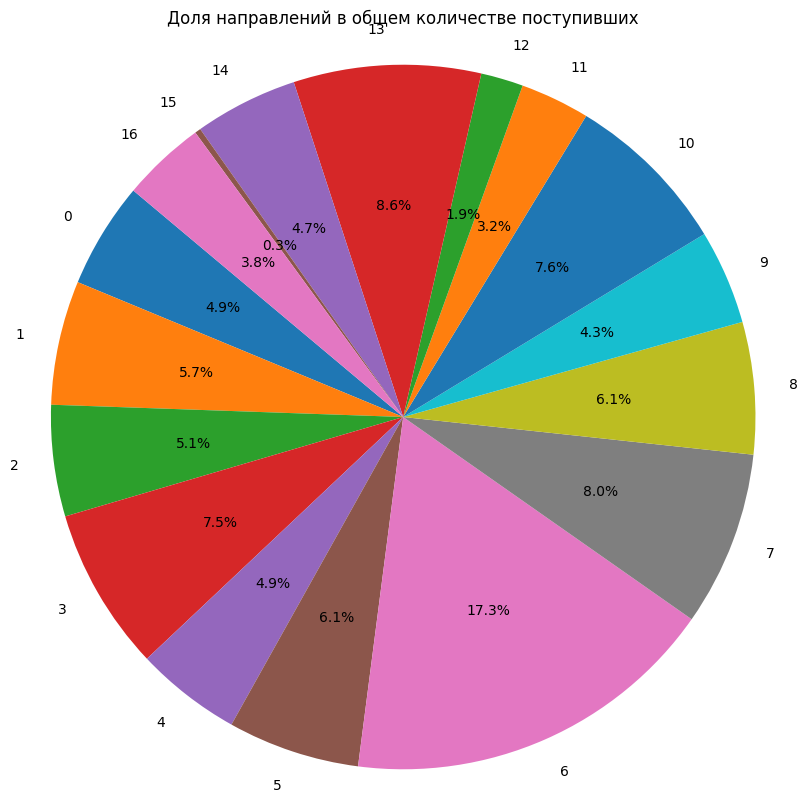

In [9]:
grouped_data = new_df.groupby('Направление_код').size().reset_index(name='Количество_поступивших')
grouped_data
# Визуализация данных
plt.figure(figsize=(10, 10))
plt.pie(grouped_data['Количество_поступивших'], labels=grouped_data['Направление_код'], autopct='%1.1f%%', startangle=140)
plt.title('Доля направлений в общем количестве поступивших')
plt.axis('equal')
plt.show()


создать новый столбец год который будет учитывать популярность направления и для самых популярных будет увеличиваться на 20% а для менее на 15% и совсем не популярных 10% каждый год   

In [530]:
df = pd.DataFrame(new_df)

# Подсчет количества студентов по направлениям
counts = df['Направление_код'].value_counts().reset_index()
counts.columns = ['Направление_код', 'Количество_поступивших']

# Определение коэффициентов роста
growth_factors = {
    # Самое популярное направление (6)
    6: [1.2, 1.44, 1.728],   # +20% каждый год
}

# Менее популярные направления (3, 7, 10 и 13)
for direction in [3, 7, 10, 13]:
    growth_factors[direction] = [1.15, 1.3225, 1.520875] # +15% каждый год

# Совсем не популярные направления (все остальные)
for direction in df['Направление_код']:
    if direction not in growth_factors:
        growth_factors[direction] = [1.1, 1.21, 1.331] # +10% каждый год


# Добавление нового столбца "Год"
years = [2022, 2023, 2024]
num_students = len(df)

# Назначение годов на основе индекса (через остаток от деления)
df['Год'] = [years[i % len(years)] for i in range(num_students)]

# Подсчет количества студентов по направлениям для каждого года с учетом коэффициентов роста
new_records = []

for index, row in df.iterrows():
    direction = row['Направление_код']
    year_index = years.index(row['Год']) # Получаем индекс года
    count = int(100 * growth_factors[direction][year_index]) # Начальное количество студентов
    
    new_records.append({'Год': row['Год'], 'Направление': direction})
# Создание нового DataFrame с распределением по годам
final_df = pd.DataFrame(new_records)

# Просмотр результатов
final_df

,Год,Направление
0,2022.0,0.0
1,2023.0,1.0
2,2024.0,2.0
3,2022.0,3.0
4,2023.0,4.0
...,...,...
4419,2022.0,3.0
4420,2023.0,3.0
4421,2024.0,6.0
4422,2022.0,13.0


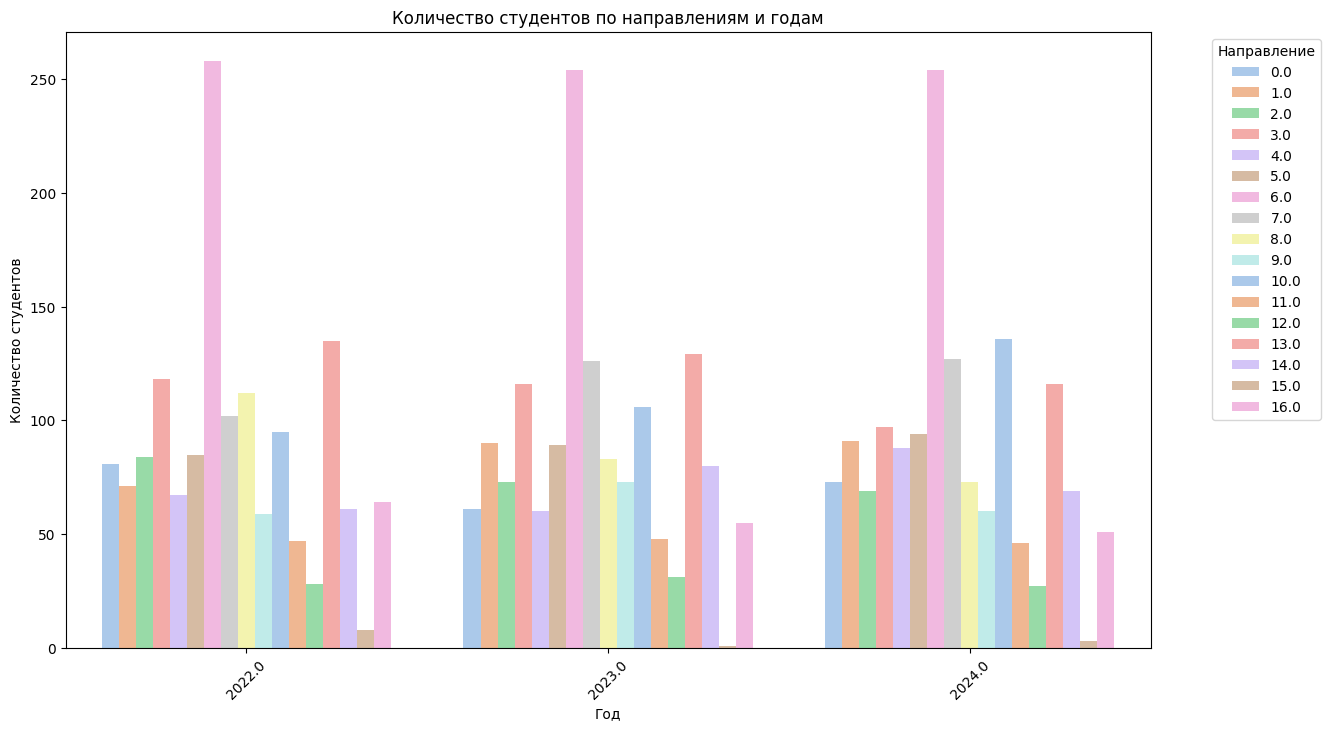

In [11]:
count_df = final_df.groupby(['Год', 'Направление']).size().reset_index(name='Количество')
# Визуализация результатов
plt.figure(figsize=(14, 8))
sns.barplot(x='Год', y='Количество', hue='Направление', data=count_df, palette='pastel')
plt.title('Количество студентов по направлениям и годам')
plt.xlabel('Год')
plt.ylabel('Количество студентов')
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Поворот меток на оси X для удобства чтения
plt.show()

In [443]:
# Подсчет общего количества студентов по годам
total_students_per_year = final_df['Год'].value_counts()
total_students_per_year

Год
2022.0    1475
2023.0    1475
2024.0    1474
Name: count, dtype: int64

In [531]:
# Добавление колонок
final_df['Уровень безработицы'] = new_df['Уровень безработицы']
final_df['Уровень инфляции'] = new_df['Уровень инфляции']
final_df['Вступительный балл'] = new_df['Вступительный балл']
final_df['Пол'] = new_df['Пол']
final_df['Образовательные специальные потребности'] = new_df['Образовательные специальные потребности']
final_df['Дневная/вечерняя форма обучения'] = new_df['Дневная/вечерняя форма обучения']
final_df['Предыдущее образование (оценка)'] = new_df['Предыдущее образование (оценка)']
final_df['Перемещенный'] = new_df['Перемещенный']
final_df['Возраст при зачислении'] = new_df['Возраст при зачислении']
final_df['Международный статус'] = new_df['Международный статус']
final_df['ВВП'] = new_df['ВВП']
final_df

,Год,Направление,Уровень безработицы,Уровень инфляции,Вступительный балл,Пол,Образовательные специальные потребности,Дневная/вечерняя форма обучения,Предыдущее образование (оценка),Перемещенный,Возраст при зачислении,Международный статус,ВВП
0,2022.0,0.0,10.8,1.4,127.3,1,0,1,122.0,1,20,0,1.74
1,2023.0,1.0,13.9,-0.3,142.5,1,0,1,160.0,1,19,0,0.79
2,2024.0,2.0,10.8,1.4,124.8,1,0,1,122.0,1,19,0,1.74
3,2022.0,3.0,9.4,-0.8,119.6,0,0,1,122.0,1,20,0,-3.12
4,2023.0,4.0,13.9,-0.3,141.5,0,0,0,100.0,0,45,0,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,2022.0,3.0,15.5,2.8,122.2,1,0,1,125.0,0,19,0,-4.06
4420,2023.0,3.0,11.1,0.6,119.0,0,0,1,120.0,1,18,1,2.02
4421,2024.0,6.0,13.9,-0.3,149.5,0,0,1,154.0,1,30,0,0.79
4422,2022.0,13.0,9.4,-0.8,153.8,0,0,1,180.0,1,20,0,-3.12


Проверка данных

In [445]:
# Проверка на отсутствие пропущенных значений
missing_values = final_df.isnull().sum()
print("Пропущенные значения в каждой колонке:")
missing_values

Пропущенные значения в каждой колонке:


Год                                        0
Направление                                0
Уровень безработицы                        0
Уровень инфляции                           0
Вступительный балл                         0
Пол                                        0
Образовательные специальные потребности    0
Дневная/вечерняя форма обучения            0
Предыдущее образование (оценка)            0
Перемещенный                               0
Возраст при зачислении                     0
Международный статус                       0
ВВП                                        0
dtype: int64

In [446]:
# Проверка уникальных значений в каждой колонке
unique_values = df.nunique()
print("\nУникальные значения в каждой колонке:")
unique_values


Уникальные значения в каждой колонке:


Режим подачи заявки                         18
Порядок подачи заявки                        8
Направление                                 17
Дневная/вечерняя форма обучения              2
Предыдущее образование                      17
Предыдущее образование (оценка)            101
Вступительный балл                         620
Перемещенный                                 2
Образовательные специальные потребности      2
Пол                                          2
Возраст при зачислении                      46
Получатель стипендии                         2
Международный статус                         2
Уровень безработицы                         10
Уровень инфляции                             9
ВВП                                         10
Направление_код                             17
Год                                          3
dtype: int64

In [532]:
# Проверка на дублирующиеся строки
duplicate_rows = final_df.duplicated().sum()

if duplicate_rows > 0:
    print(f"\nКоличество дублирующихся строк: {duplicate_rows}")
    # Удаление дублирующихся строк
    final_df.drop_duplicates(inplace=True)
    
    # Количество строк после удаления дубликатов
    print(f"Количество удаленных дублирующихся строк: {duplicate_rows}")
    print(f"Количество строк после удаления дубликатов: {len(final_df)}")
else:
    print("\nДубликатов нет.")


Количество дублирующихся строк: 9
Количество удаленных дублирующихся строк: 9
Количество строк после удаления дубликатов: 4415


In [17]:
# Статистический анализ данных
description = final_df.describe()
print("\nСтатистический анализ данных:")
print(description)


Статистический анализ данных:
               Год  Направление  Уровень безработицы  Уровень инфляции  \
count  4415.000000  4415.000000          4415.000000       4415.000000   
mean   2022.999547     7.138165            11.563171          1.227860   
std       0.816404     4.286725             2.663770          1.382568   
min    2022.000000     0.000000             7.600000         -0.800000   
25%    2022.000000     4.000000             9.400000          0.300000   
50%    2023.000000     6.000000            11.100000          1.400000   
75%    2024.000000    10.000000            13.900000          2.600000   
max    2024.000000    16.000000            16.200000          3.700000   

       Вступительный балл          Пол  \
count         4415.000000  4415.000000   
mean           126.967112     0.352208   
std             14.474269     0.477713   
min             95.000000     0.000000   
25%            117.900000     0.000000   
50%            126.100000     0.000000   
75%     

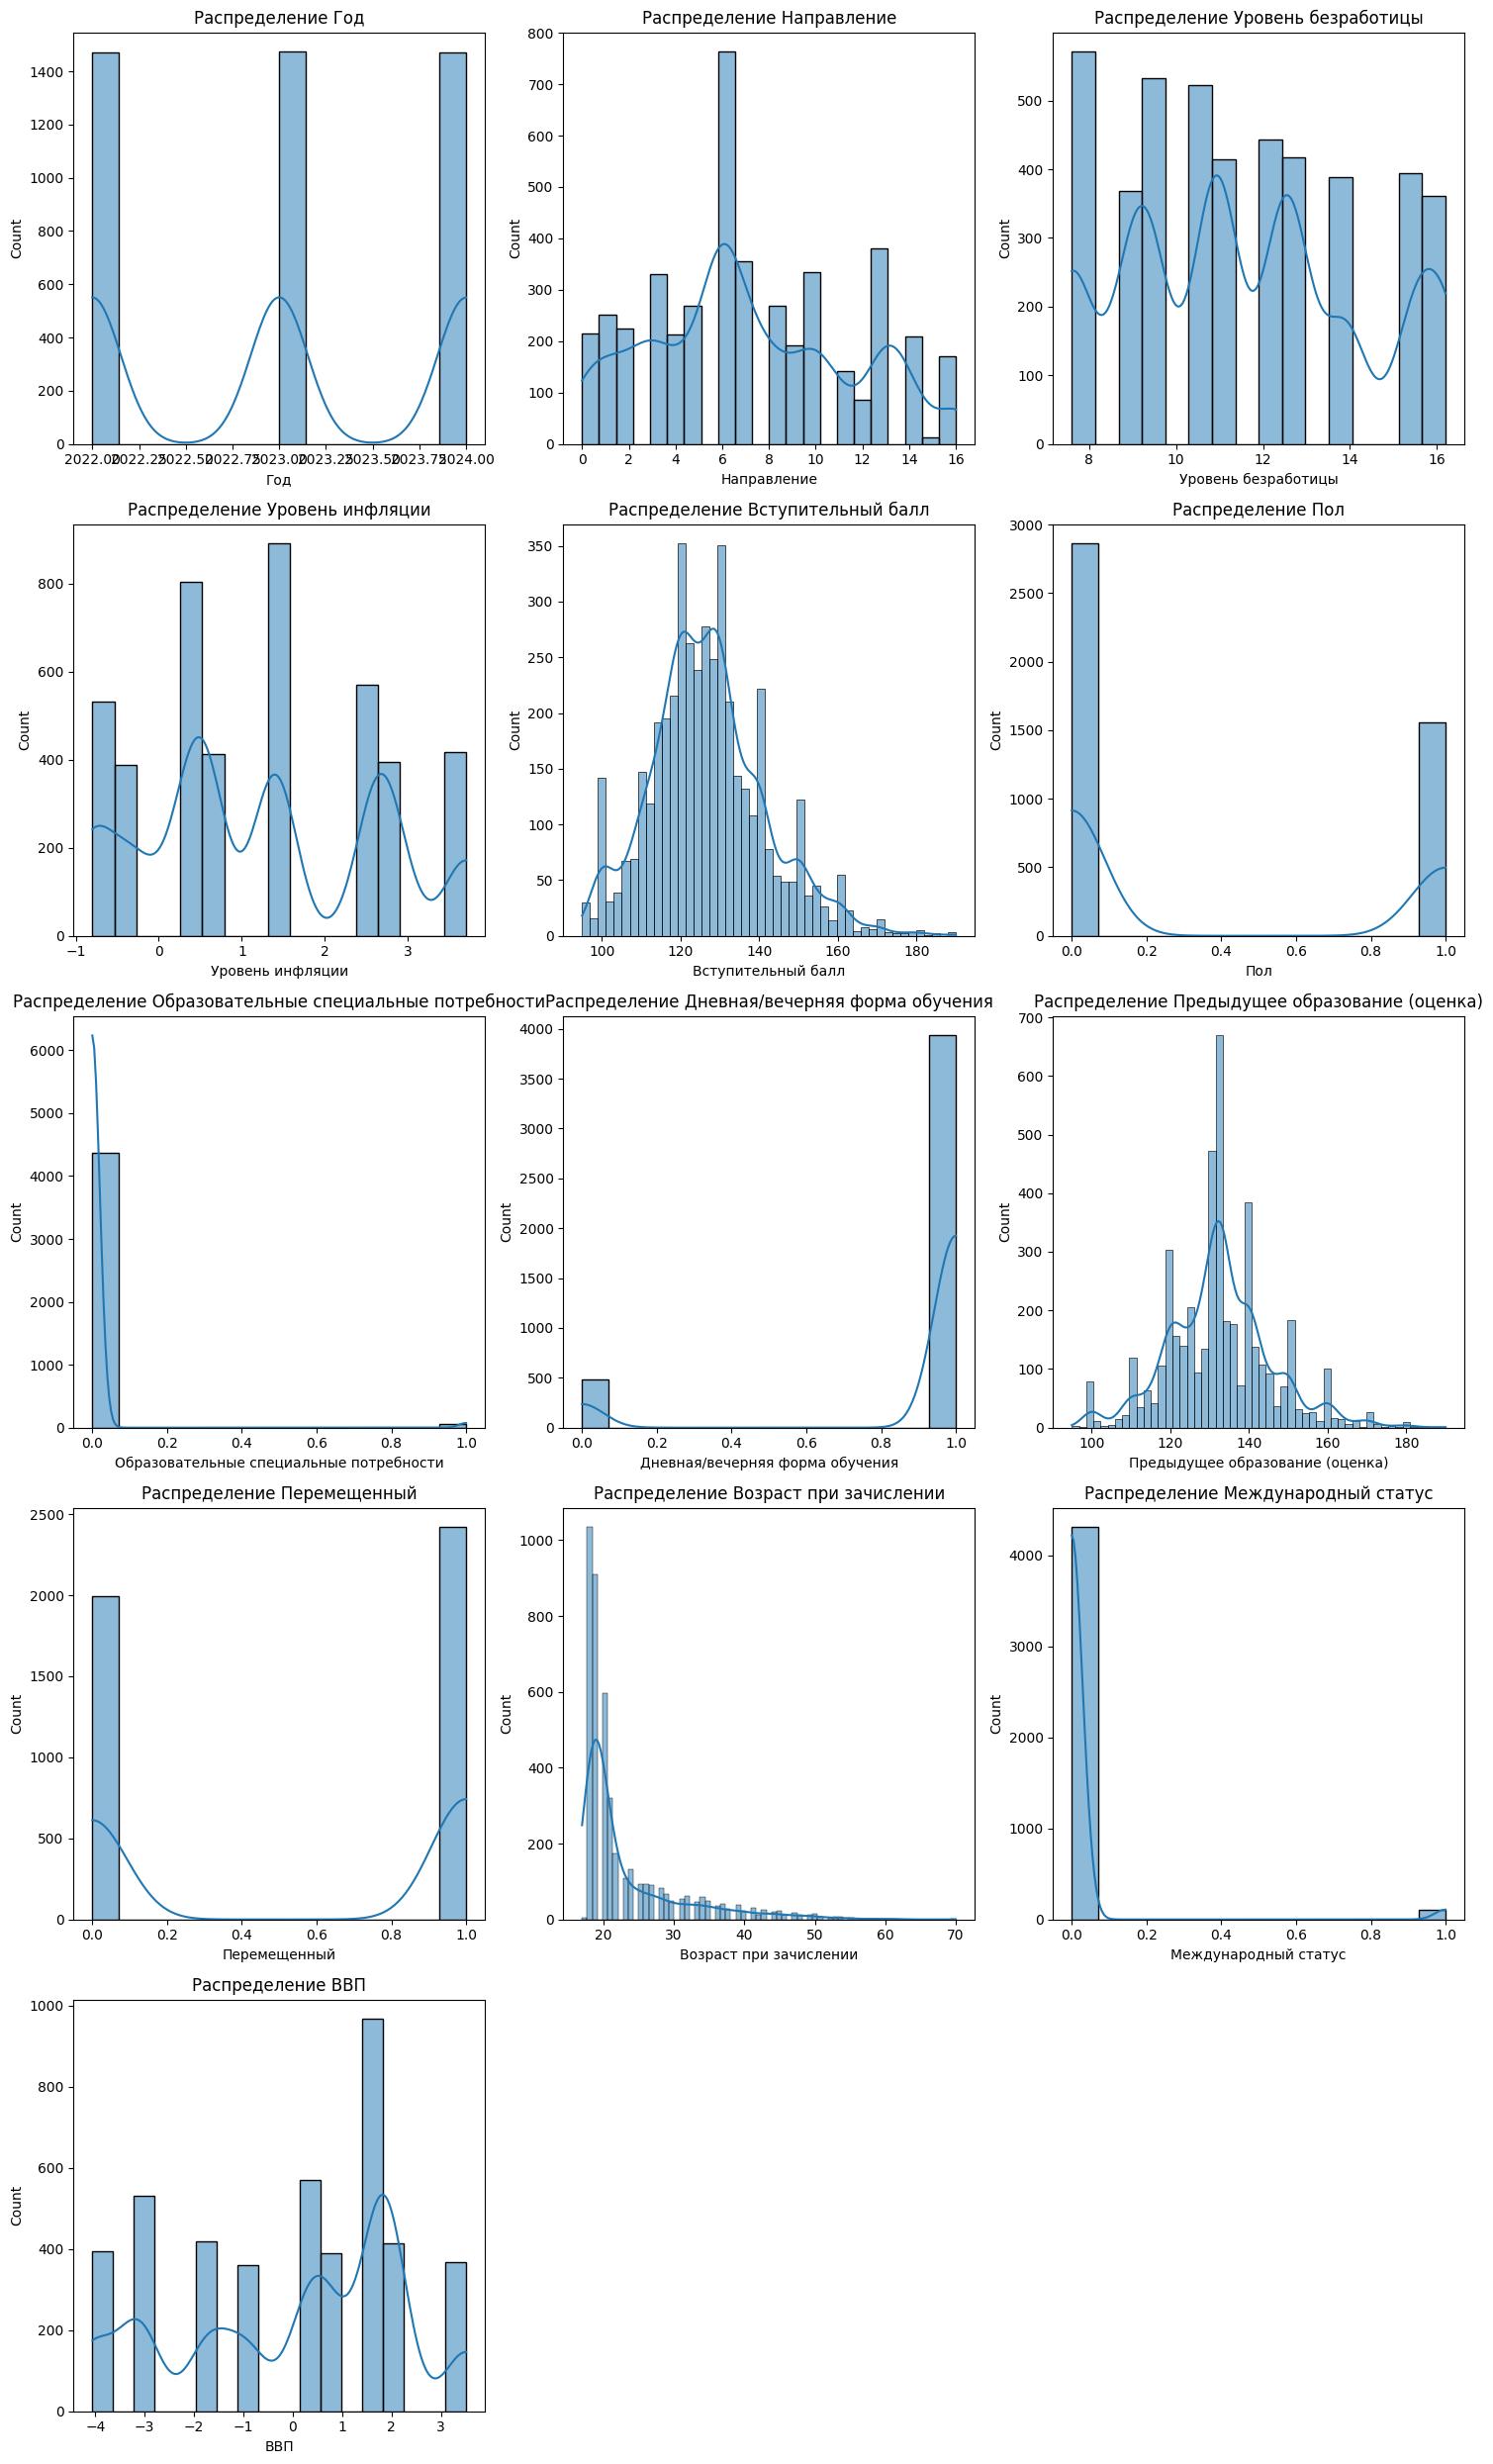

In [204]:
# Определение числовых колонок
numeric_columns = final_df.select_dtypes(include=[np.number]).columns.tolist()

# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(final_df[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

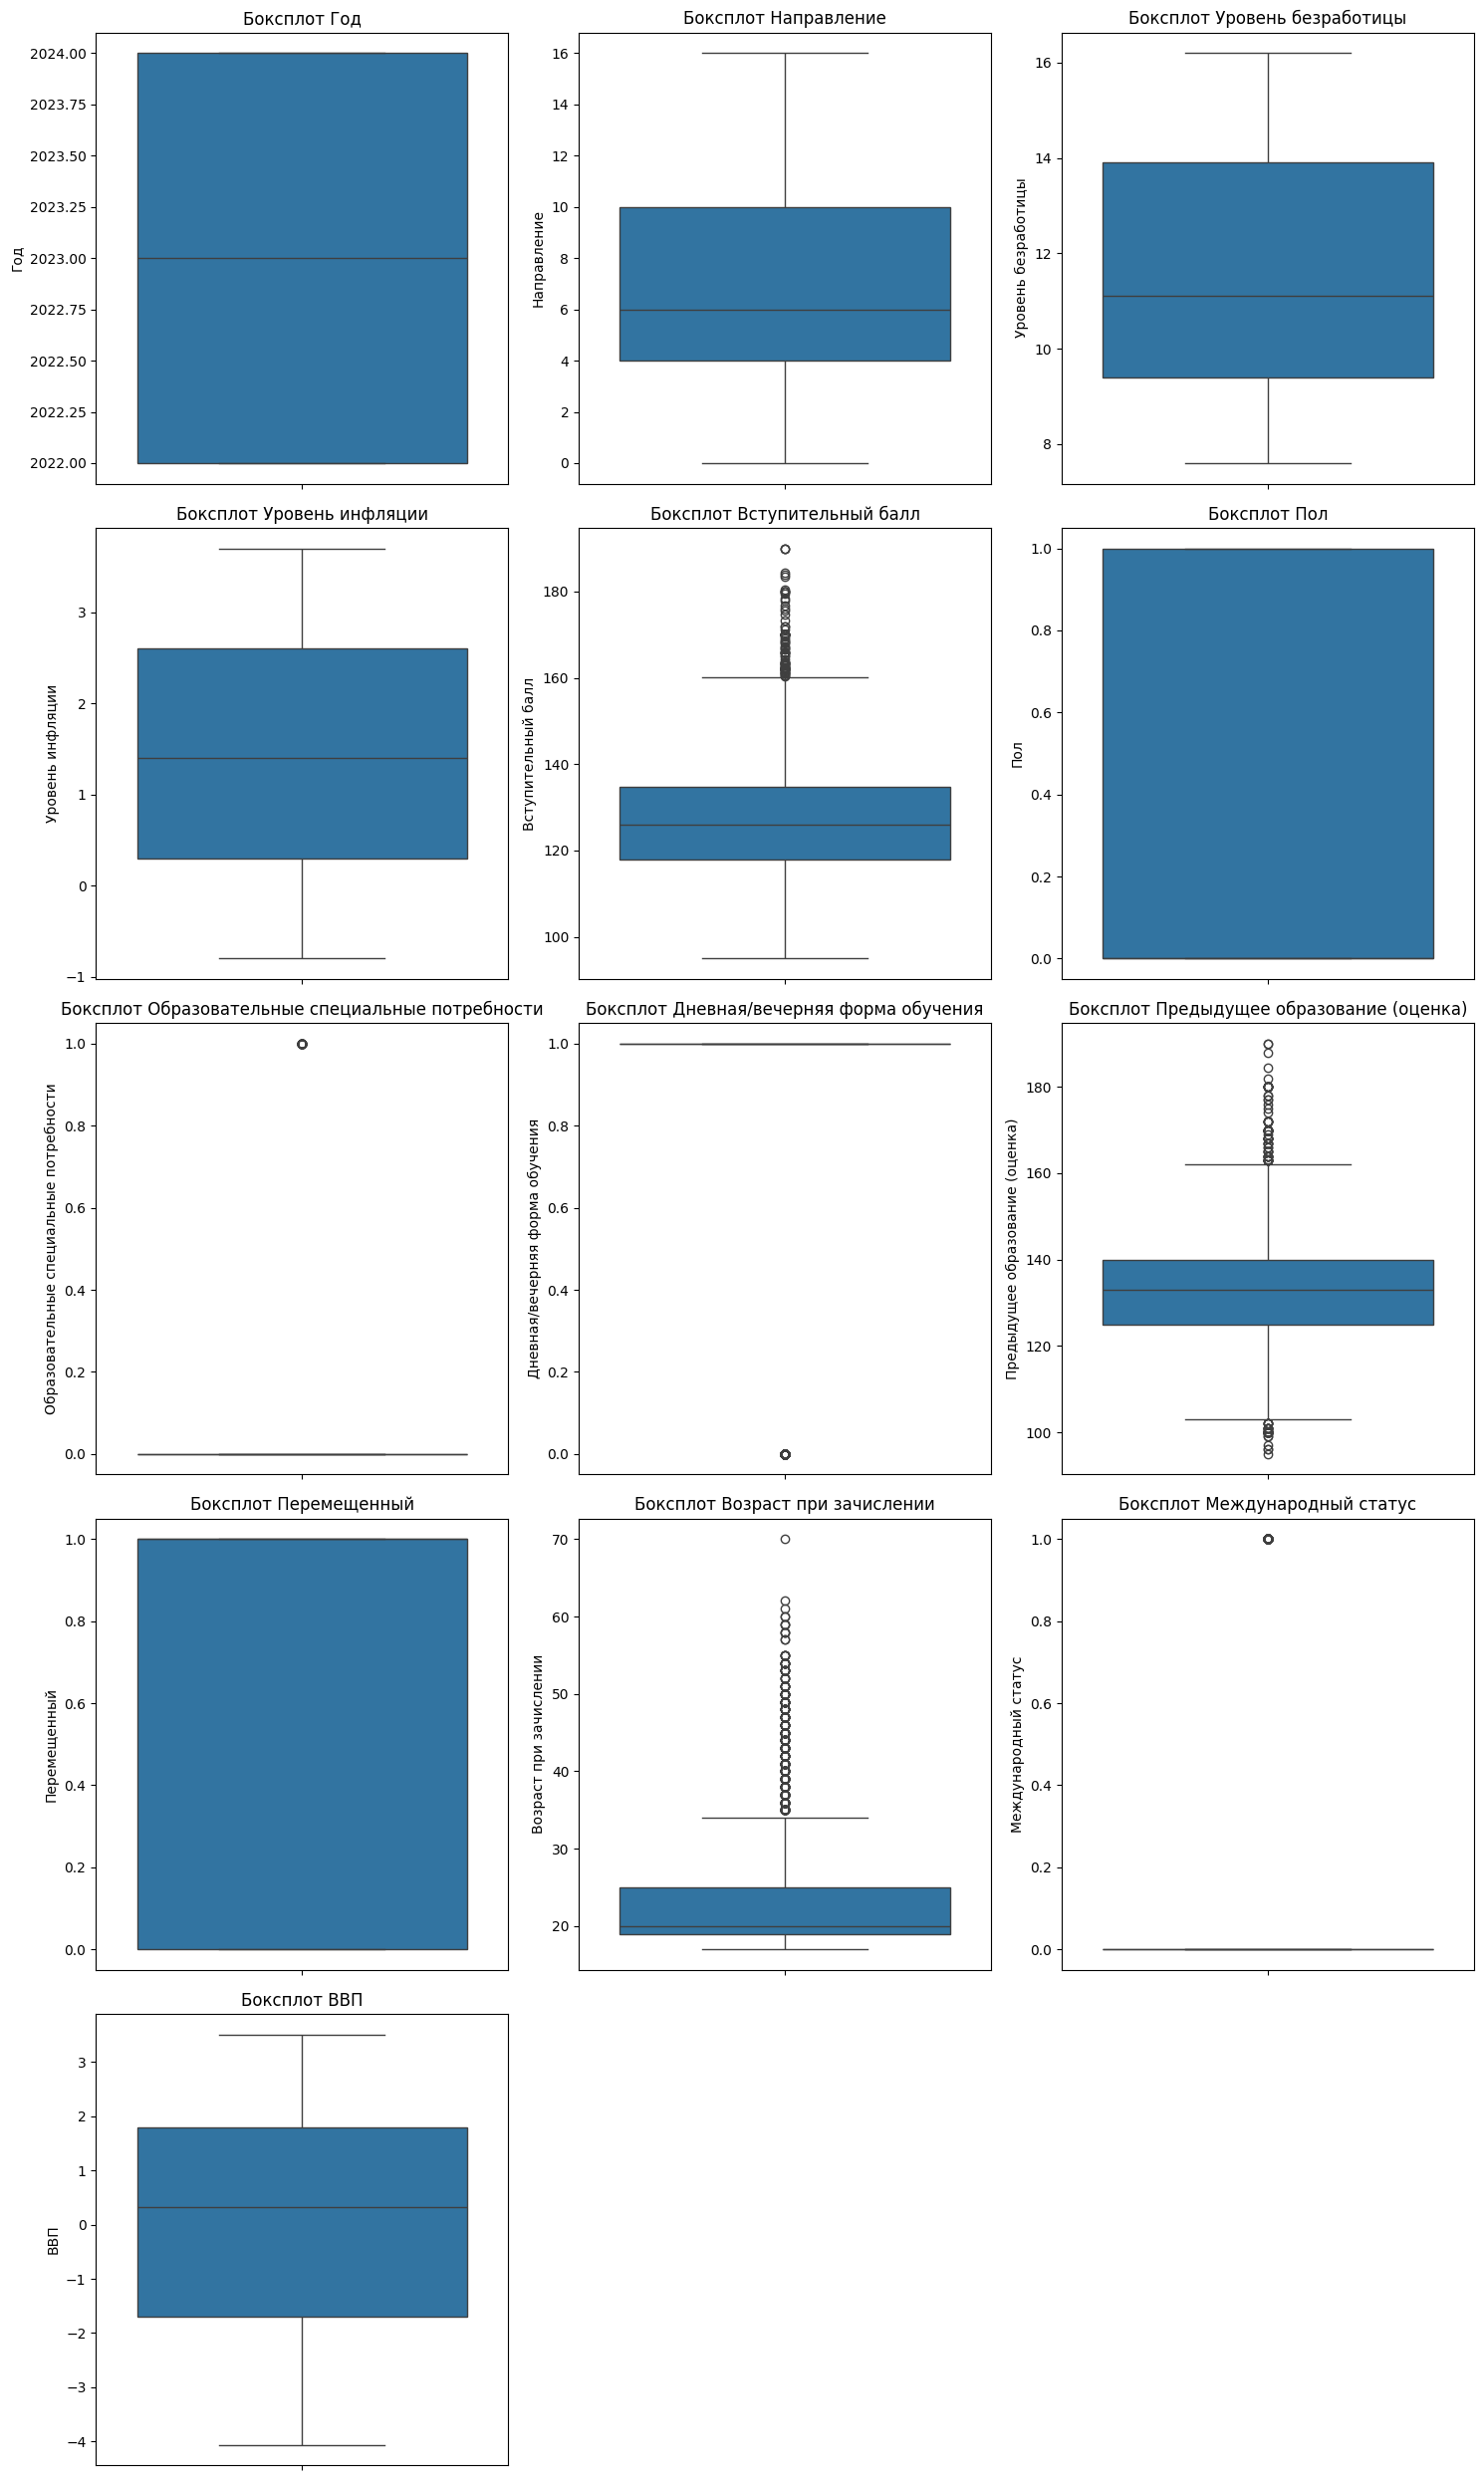

In [19]:
# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=final_df[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

c:\Users\1645295\Documents\GitHub\diplom\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\1645295\AppData\Local\Temp\ipykernel_4180\1571102237.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X.values.flatten(), X_sm.values.flatten()],


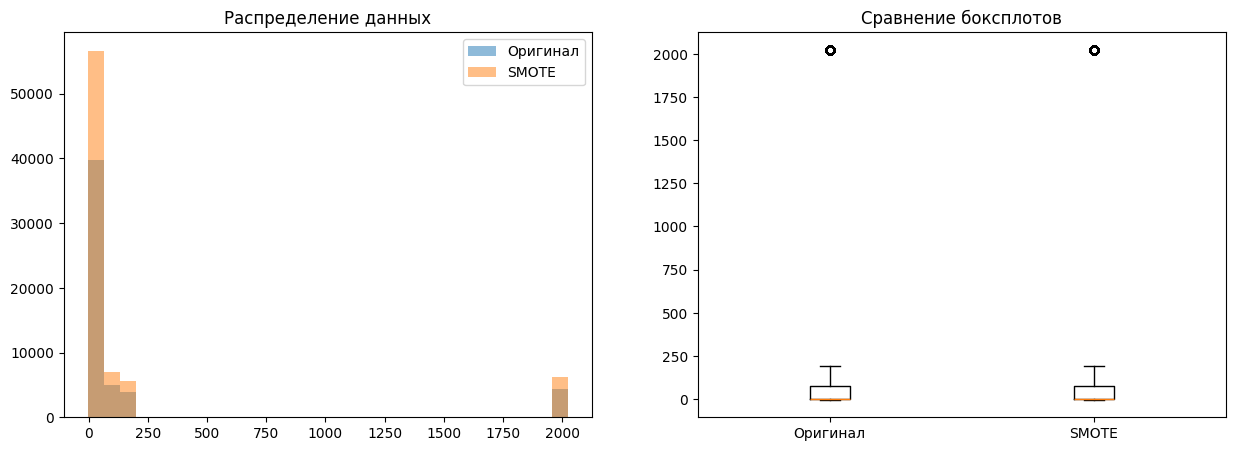

Оригинальное распределение:
Дневная/вечерняя форма обучения
1    3933
0     482
Name: count, dtype: int64

Новое распределение после SMOTE:
Дневная/вечерняя форма обучения
1    3933
0    2359
Name: count, dtype: int64

Статистика оригинальных данных: {'mean': np.float64(193.89218403171012), 'median': np.float64(193.50166666666667), 'std': np.float64(3.992601895763974)}
Статистика SMOTE данных: {'mean': np.float64(193.95818790880898), 'median': np.float64(193.485), 'std': np.float64(4.109983897167136)}
T-тест: статистика=-0.021041473915708882, p-value=0.983212604264293


In [537]:
from imblearn.over_sampling import SMOTE
from scipy import stats

def validate_smote(original_data, target_column): 
    # Подготовка данных для SMOTE 
    X = original_data.drop(columns=[target_column]) 
    y = original_data[target_column] 
 
    # Создание объекта SMOTE 
    smote = SMOTE(sampling_strategy={0: 2359, 1: 3933}, random_state=42) 
 
    # Применение SMOTE к данным 
    X_sm, y_sm = smote.fit_resample(X, y) 
 
    # Статистический анализ 
    original_stats = { 
        'mean': X.mean().mean(), 
        'median': X.median().mean(), 
        'std': X.std().mean()
    } 
         
    synthetic_stats = { 
        'mean': X_sm.mean().mean(), 
        'median': X_sm.median().mean(), 
        'std': X_sm.std().mean()
    } 

    # Визуализация
    plt.figure(figsize=(15,5)) 
    plt.subplot(121) 
    plt.hist(X.values.flatten(), bins=30, alpha=0.5, label='Оригинал') 
    plt.hist(X_sm.values.flatten(), bins=30, alpha=0.5, label='SMOTE') 
    plt.legend() 
    plt.title('Распределение данных') 
 
    plt.subplot(122) 
    plt.boxplot([X.values.flatten(), X_sm.values.flatten()], 
                labels=['Оригинал', 'SMOTE']) 
    plt.title('Сравнение боксплотов') 
    plt.show() 

    # Распределение классов
    print("Оригинальное распределение:")
    print(y.value_counts())
    print("\nНовое распределение после SMOTE:")
    print(y_sm.value_counts())
 
    # Статистический тест 
    t_test = stats.ttest_ind(X.values.flatten(), X_sm.values.flatten()) 
         
    print("\nСтатистика оригинальных данных:", original_stats) 
    print("Статистика SMOTE данных:", synthetic_stats) 
    print(f"T-тест: статистика={t_test.statistic}, p-value={t_test.pvalue}") 

    # Воссоздание DataFrame
    balanced_df = pd.concat([
        pd.DataFrame(X_sm, columns=X.columns), 
        pd.Series(y_sm, name=target_column)
    ], axis=1)

    return balanced_df

# Вызов функции
ex_df = validate_smote(final_df, 'Дневная/вечерняя форма обучения')


c:\Users\1645295\Documents\GitHub\diplom\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\1645295\AppData\Local\Temp\ipykernel_4180\2869329959.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X.values.flatten(), X_sm.values.flatten()],


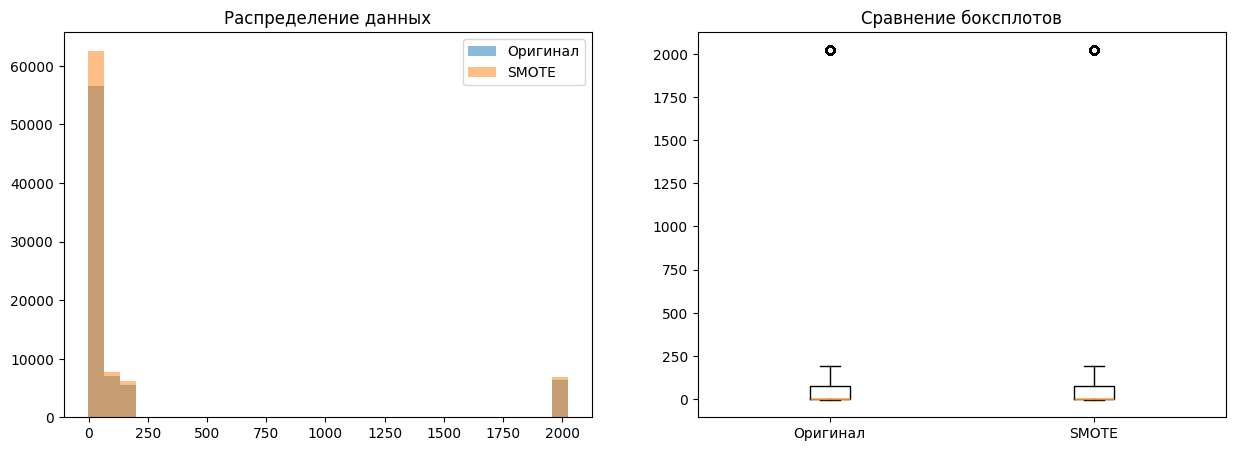

Оригинальное распределение:
Пол
0    4440
1    1852
Name: count, dtype: int64

Новое распределение после SMOTE:
Пол
0    4440
1    2517
Name: count, dtype: int64

Статистика оригинальных данных: {'mean': np.float64(193.9857493625068), 'median': np.float64(193.56833333333336), 'std': np.float64(4.112347083053911)}
Статистика SMOTE данных: {'mean': np.float64(193.98241622079345), 'median': np.float64(193.57666666666668), 'std': np.float64(4.113769390899684)}
T-тест: статистика=0.0011991214078146879, p-value=0.9990432412759356


In [580]:
def validate_smote(original_data, target_column): 
    # Подготовка данных для SMOTE 
    X = original_data.drop(columns=[target_column]) 
    y = original_data[target_column] 
 
    # Создание объекта SMOTE 
    smote = SMOTE(sampling_strategy={0: 4440, 1: 2517}, random_state=42) 
 
    # Применение SMOTE к данным 
    X_sm, y_sm = smote.fit_resample(X, y) 
 
    # Статистический анализ 
    original_stats = { 
        'mean': X.mean().mean(), 
        'median': X.median().mean(), 
        'std': X.std().mean()
    } 
         
    synthetic_stats = { 
        'mean': X_sm.mean().mean(), 
        'median': X_sm.median().mean(), 
        'std': X_sm.std().mean()
    } 

    # Визуализация
    plt.figure(figsize=(15,5)) 
    plt.subplot(121) 
    plt.hist(X.values.flatten(), bins=30, alpha=0.5, label='Оригинал') 
    plt.hist(X_sm.values.flatten(), bins=30, alpha=0.5, label='SMOTE') 
    plt.legend() 
    plt.title('Распределение данных') 
 
    plt.subplot(122) 
    plt.boxplot([X.values.flatten(), X_sm.values.flatten()], 
                labels=['Оригинал', 'SMOTE']) 
    plt.title('Сравнение боксплотов') 
    plt.show() 

    # Распределение классов
    print("Оригинальное распределение:")
    print(y.value_counts())
    print("\nНовое распределение после SMOTE:")
    print(y_sm.value_counts())
 
    # Статистический тест 
    t_test = stats.ttest_ind(X.values.flatten(), X_sm.values.flatten()) 
         
    print("\nСтатистика оригинальных данных:", original_stats) 
    print("Статистика SMOTE данных:", synthetic_stats) 
    print(f"T-тест: статистика={t_test.statistic}, p-value={t_test.pvalue}") 

    # Воссоздание DataFrame
    balanced_df = pd.concat([
        pd.DataFrame(X_sm, columns=X.columns), 
        pd.Series(y_sm, name=target_column)
    ], axis=1)

    return balanced_df

# Вызов функции
df = validate_smote(ex_df, 'Пол')


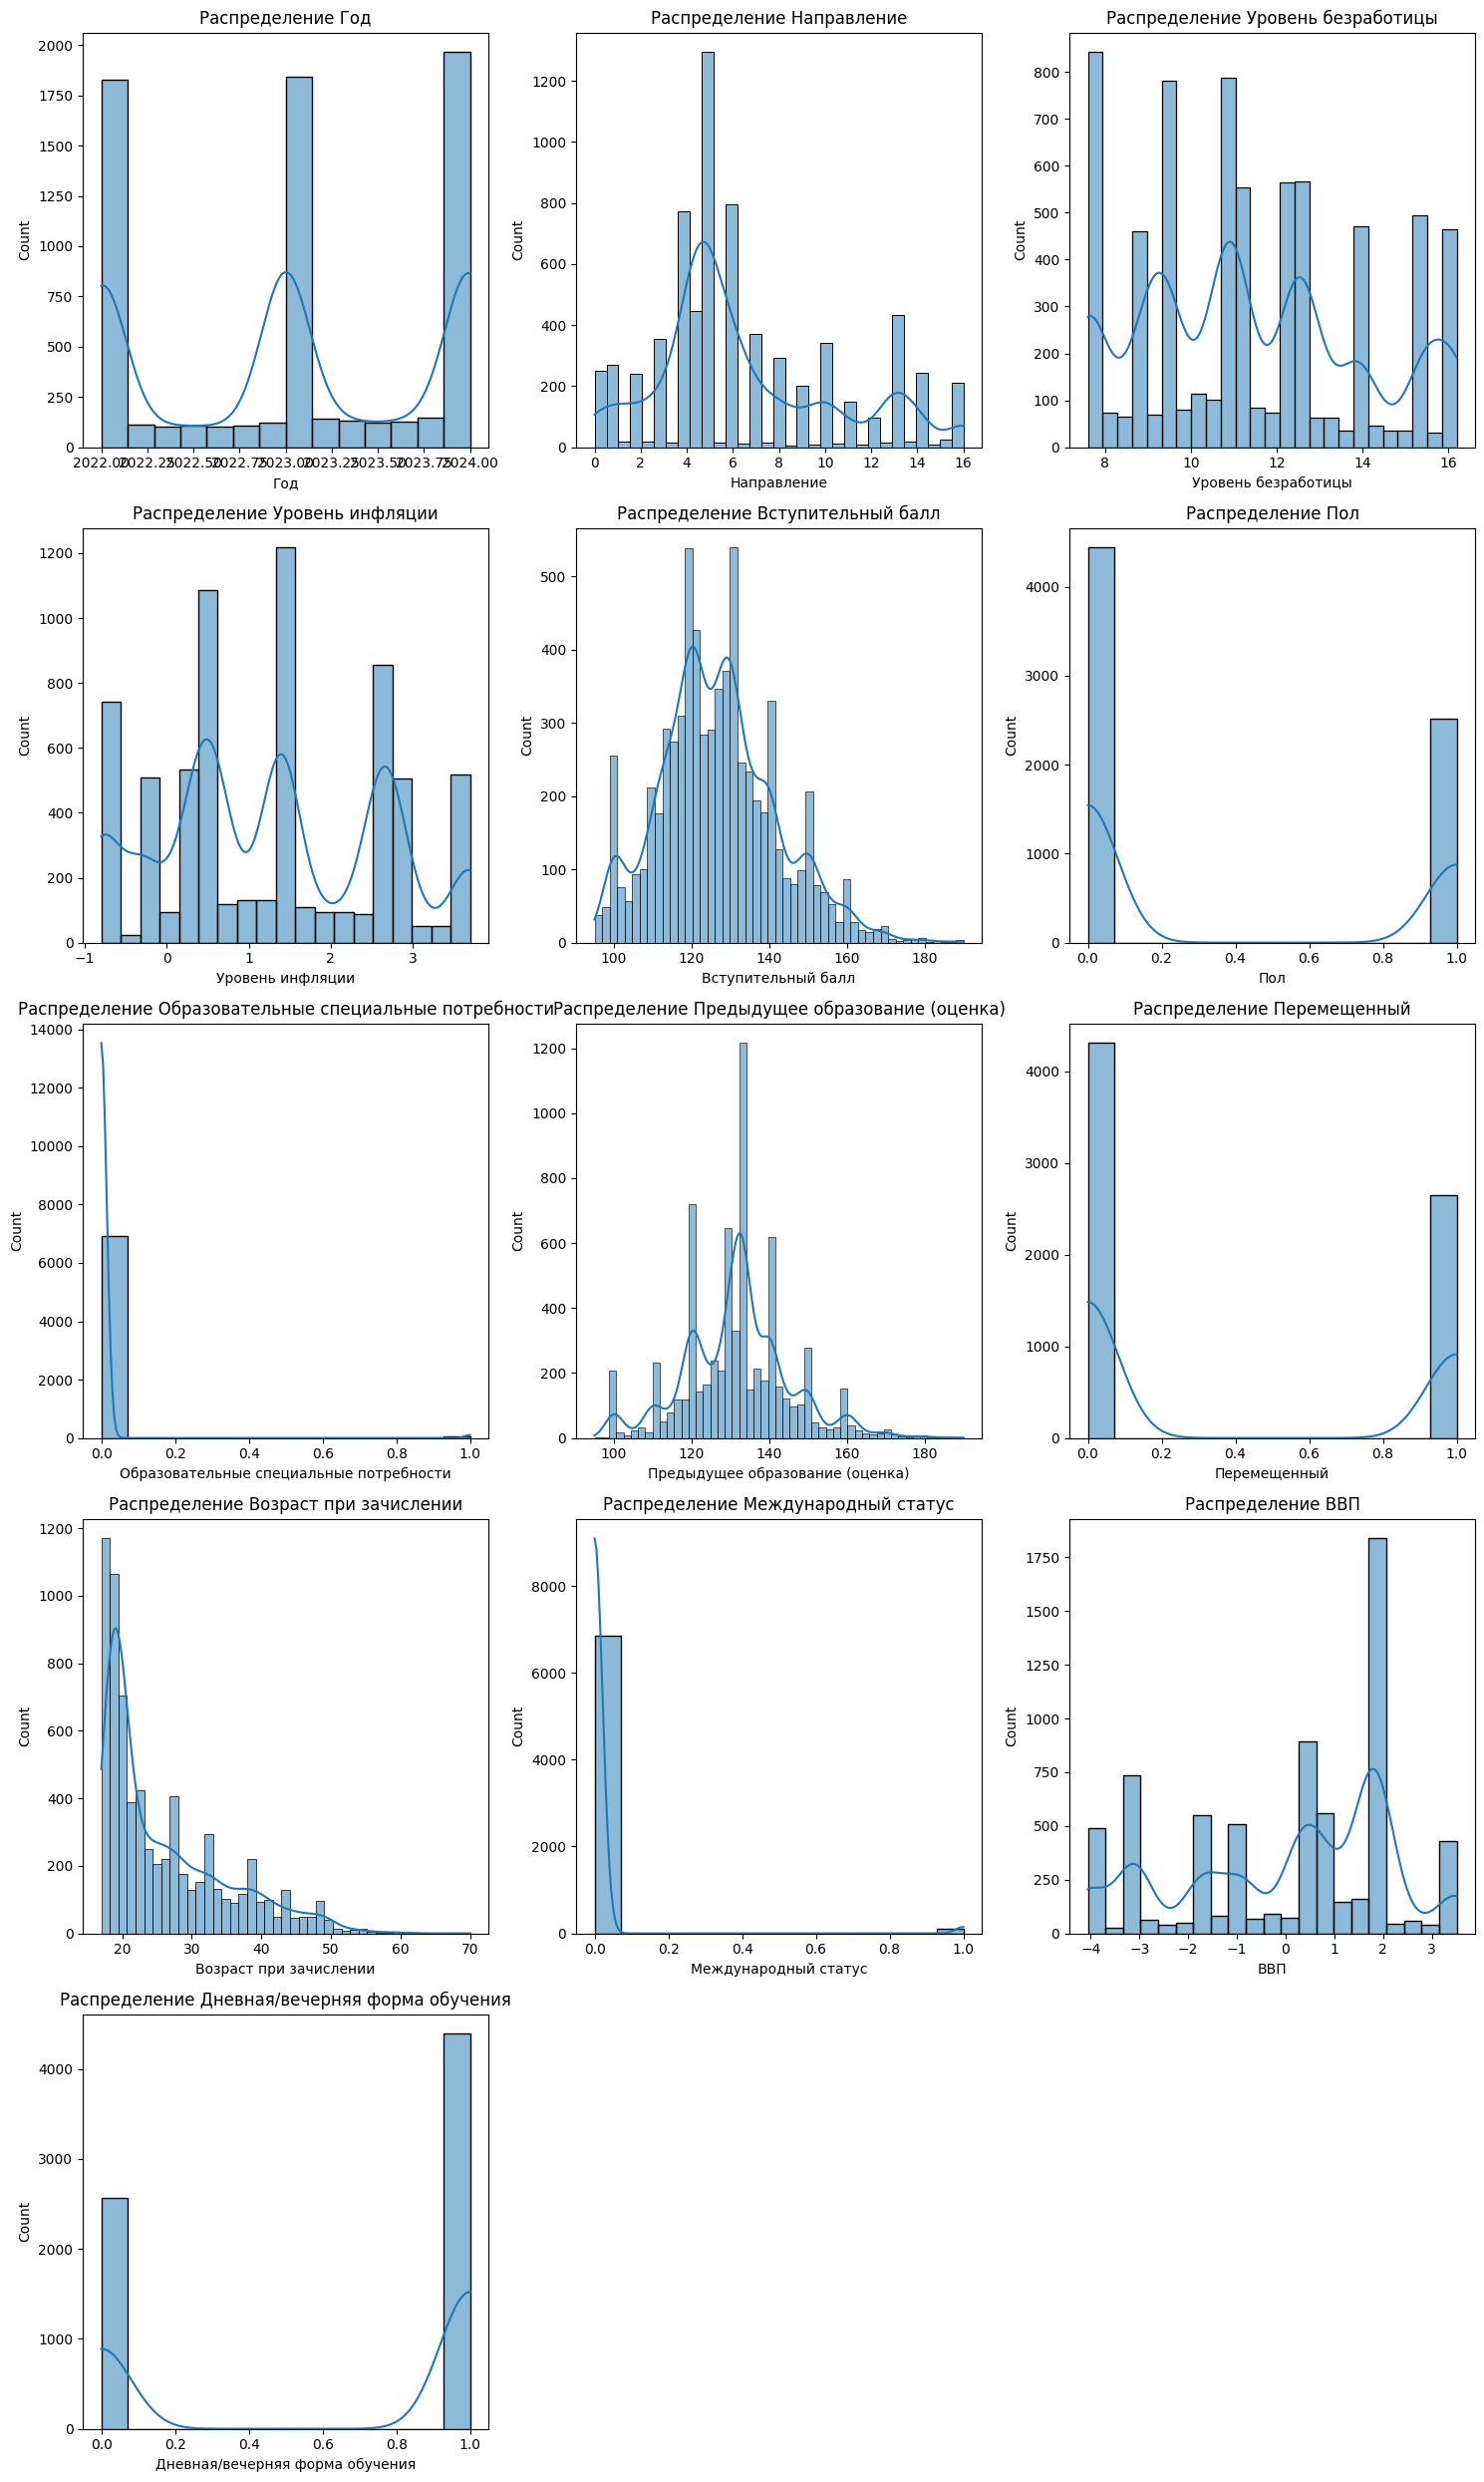

In [551]:
# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

In [595]:
# Округление значений
columns_to_round = ['Направление', 'Год', 'ВВП', 'Уровень безработицы', 'Уровень инфляции']
df[columns_to_round] = df[columns_to_round].round()
df

,Год,Направление,Уровень безработицы,Уровень инфляции,Вступительный балл,Образовательные специальные потребности,Предыдущее образование (оценка),Перемещенный,Возраст при зачислении,Международный статус,ВВП,Дневная/вечерняя форма обучения,Пол
0,2022.0,0,11.0,1.0,127.300000,0,122.000000,1,20,0,2.0,1,1
1,2023.0,1,14.0,-0.0,142.500000,0,160.000000,1,19,0,1.0,1,1
2,2024.0,2,11.0,1.0,124.800000,0,122.000000,1,19,0,2.0,1,1
3,2022.0,3,9.0,-1.0,119.600000,0,122.000000,1,20,0,-3.0,1,0
4,2023.0,4,14.0,-0.0,141.500000,0,100.000000,0,45,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,2023.0,10,9.0,1.0,138.253047,0,133.128172,1,24,0,3.0,1,1
6953,2022.0,7,13.0,4.0,140.171825,0,151.074920,0,19,0,-2.0,1,1
6954,2023.0,16,8.0,3.0,121.826189,0,129.000000,1,19,0,0.0,1,1
6955,2022.0,0,9.0,-1.0,127.843096,0,129.142640,0,19,0,-3.0,1,1


In [636]:
def balanced_sampling(df, target_size=870):
    direction_counts = df['Направление'].value_counts()
    
    balanced_data = []
    
    for direction in direction_counts.index:
        group = df[df['Направление'] == direction]
        
        if len(group) > target_size:
            # Стратифицированная случайная выборка
            group = group.sample(n=target_size, random_state=42)
        
        balanced_data.append(group)
    
    balanced_df = pd.concat(balanced_data)
    
    return balanced_df


# Применение
ex1_df = balanced_sampling(df, target_size=870)

# Проверка распределения
print("Распределение после балансировки:")
print(ex1_df['Направление'].value_counts())

Распределение после балансировки:
Направление
5     870
4     870
6     809
13    445
7     385
3     366
10    349
8     304
1     287
14    262
2     259
0     251
16    210
9     207
11    160
12    106
15     30
Name: count, dtype: int64


np.int64(6170)

In [480]:
# Группировка возраста в интервалы
bins = [15, 20, 25, 30, 35, 50]
labels = ['16-20', '21-25', '26-30', '31-35', '36-70']
final_df['Возраст группа'] = pd.cut(final_df['Возраст при зачислении'], bins=bins, labels=labels, right=False)
final_df['Возраст группа'].value_counts()

Возраст группа
16-20    1990
21-25    1460
36-70     763
26-30     720
31-35     498
Name: count, dtype: int64

In [481]:
# Округление значений в колонке "Предыдущее образование (оценка)"
final_df['Предыдущее образование (оценка)'] = final_df['Предыдущее образование (оценка)'].round()
final_df['Предыдущее образование (оценка)'].value_counts()

Предыдущее образование (оценка)
133.0    795
130.0    458
120.0    444
140.0    416
150.0    202
        ... 
184.0      1
174.0      1
182.0      1
95.0       1
169.0      1
Name: count, Length: 86, dtype: int64

In [482]:
# Замена выборосов на медиану 
# Определение квартилей и IQR
Q1 = final_df['Предыдущее образование (оценка)'].quantile(0.25)
Q3 = final_df['Предыдущее образование (оценка)'].quantile(0.75)
IQR = Q3 - Q1

# Установка пороговых значений
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Вычисление медианы для замены выбросов
median_value = final_df['Предыдущее образование (оценка)'].median()

# Замена выбросов на медиану
final_df['Предыдущее образование (оценка)'] = final_df['Предыдущее образование (оценка)'].mask((final_df['Предыдущее образование (оценка)'] < lower) | (final_df['Предыдущее образование (оценка)'] > upper), median_value)

final_df['Предыдущее образование (оценка)'].value_counts()

Предыдущее образование (оценка)
133.0    873
130.0    458
120.0    444
140.0    416
150.0    202
        ... 
105.0      5
107.0      4
103.0      4
165.0      3
99.0       2
Name: count, Length: 66, dtype: int64

In [483]:
# Округление значений 
final_df['Вступительный балл'] = final_df['Вступительный балл'].round()
final_df['Вступительный балл'].value_counts()

Вступительный балл
120.0    342
130.0    317
140.0    212
128.0    191
100.0    173
        ... 
177.0      1
175.0      1
171.0      1
172.0      1
173.0      1
Name: count, Length: 86, dtype: int64

In [484]:
# Замена выборосов на медиану в колонке предыдущая оценка

# Определение квартилей и IQR
Q1 = final_df['Вступительный балл'].quantile(0.25)
Q3 = final_df['Вступительный балл'].quantile(0.75)
IQR = Q3 - Q1

# Установка пороговых значений
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Вычисление медианы для замены выбросов
median_value = final_df['Вступительный балл'].median()

# Замена выбросов на медиану
final_df['Вступительный балл'] = final_df['Вступительный балл'].mask((final_df['Вступительный балл'] < lower) | (final_df['Вступительный балл'] > upper), median_value)

final_df['Вступительный балл'].value_counts()

Вступительный балл
120.0    342
130.0    317
126.0    236
140.0    212
128.0    191
        ... 
161.0     11
97.0      11
158.0     11
95.0      11
159.0      9
Name: count, Length: 68, dtype: int64

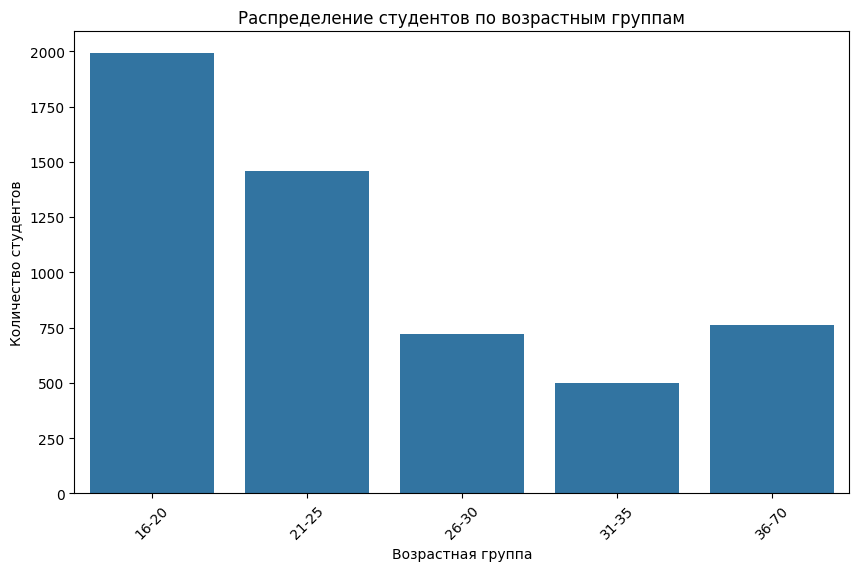

In [485]:
# Проверка уникальности индексов
df1 = final_df.reset_index(drop=True)

# Создание графика распределения
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='Возраст группа')
plt.title('Распределение студентов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.show()

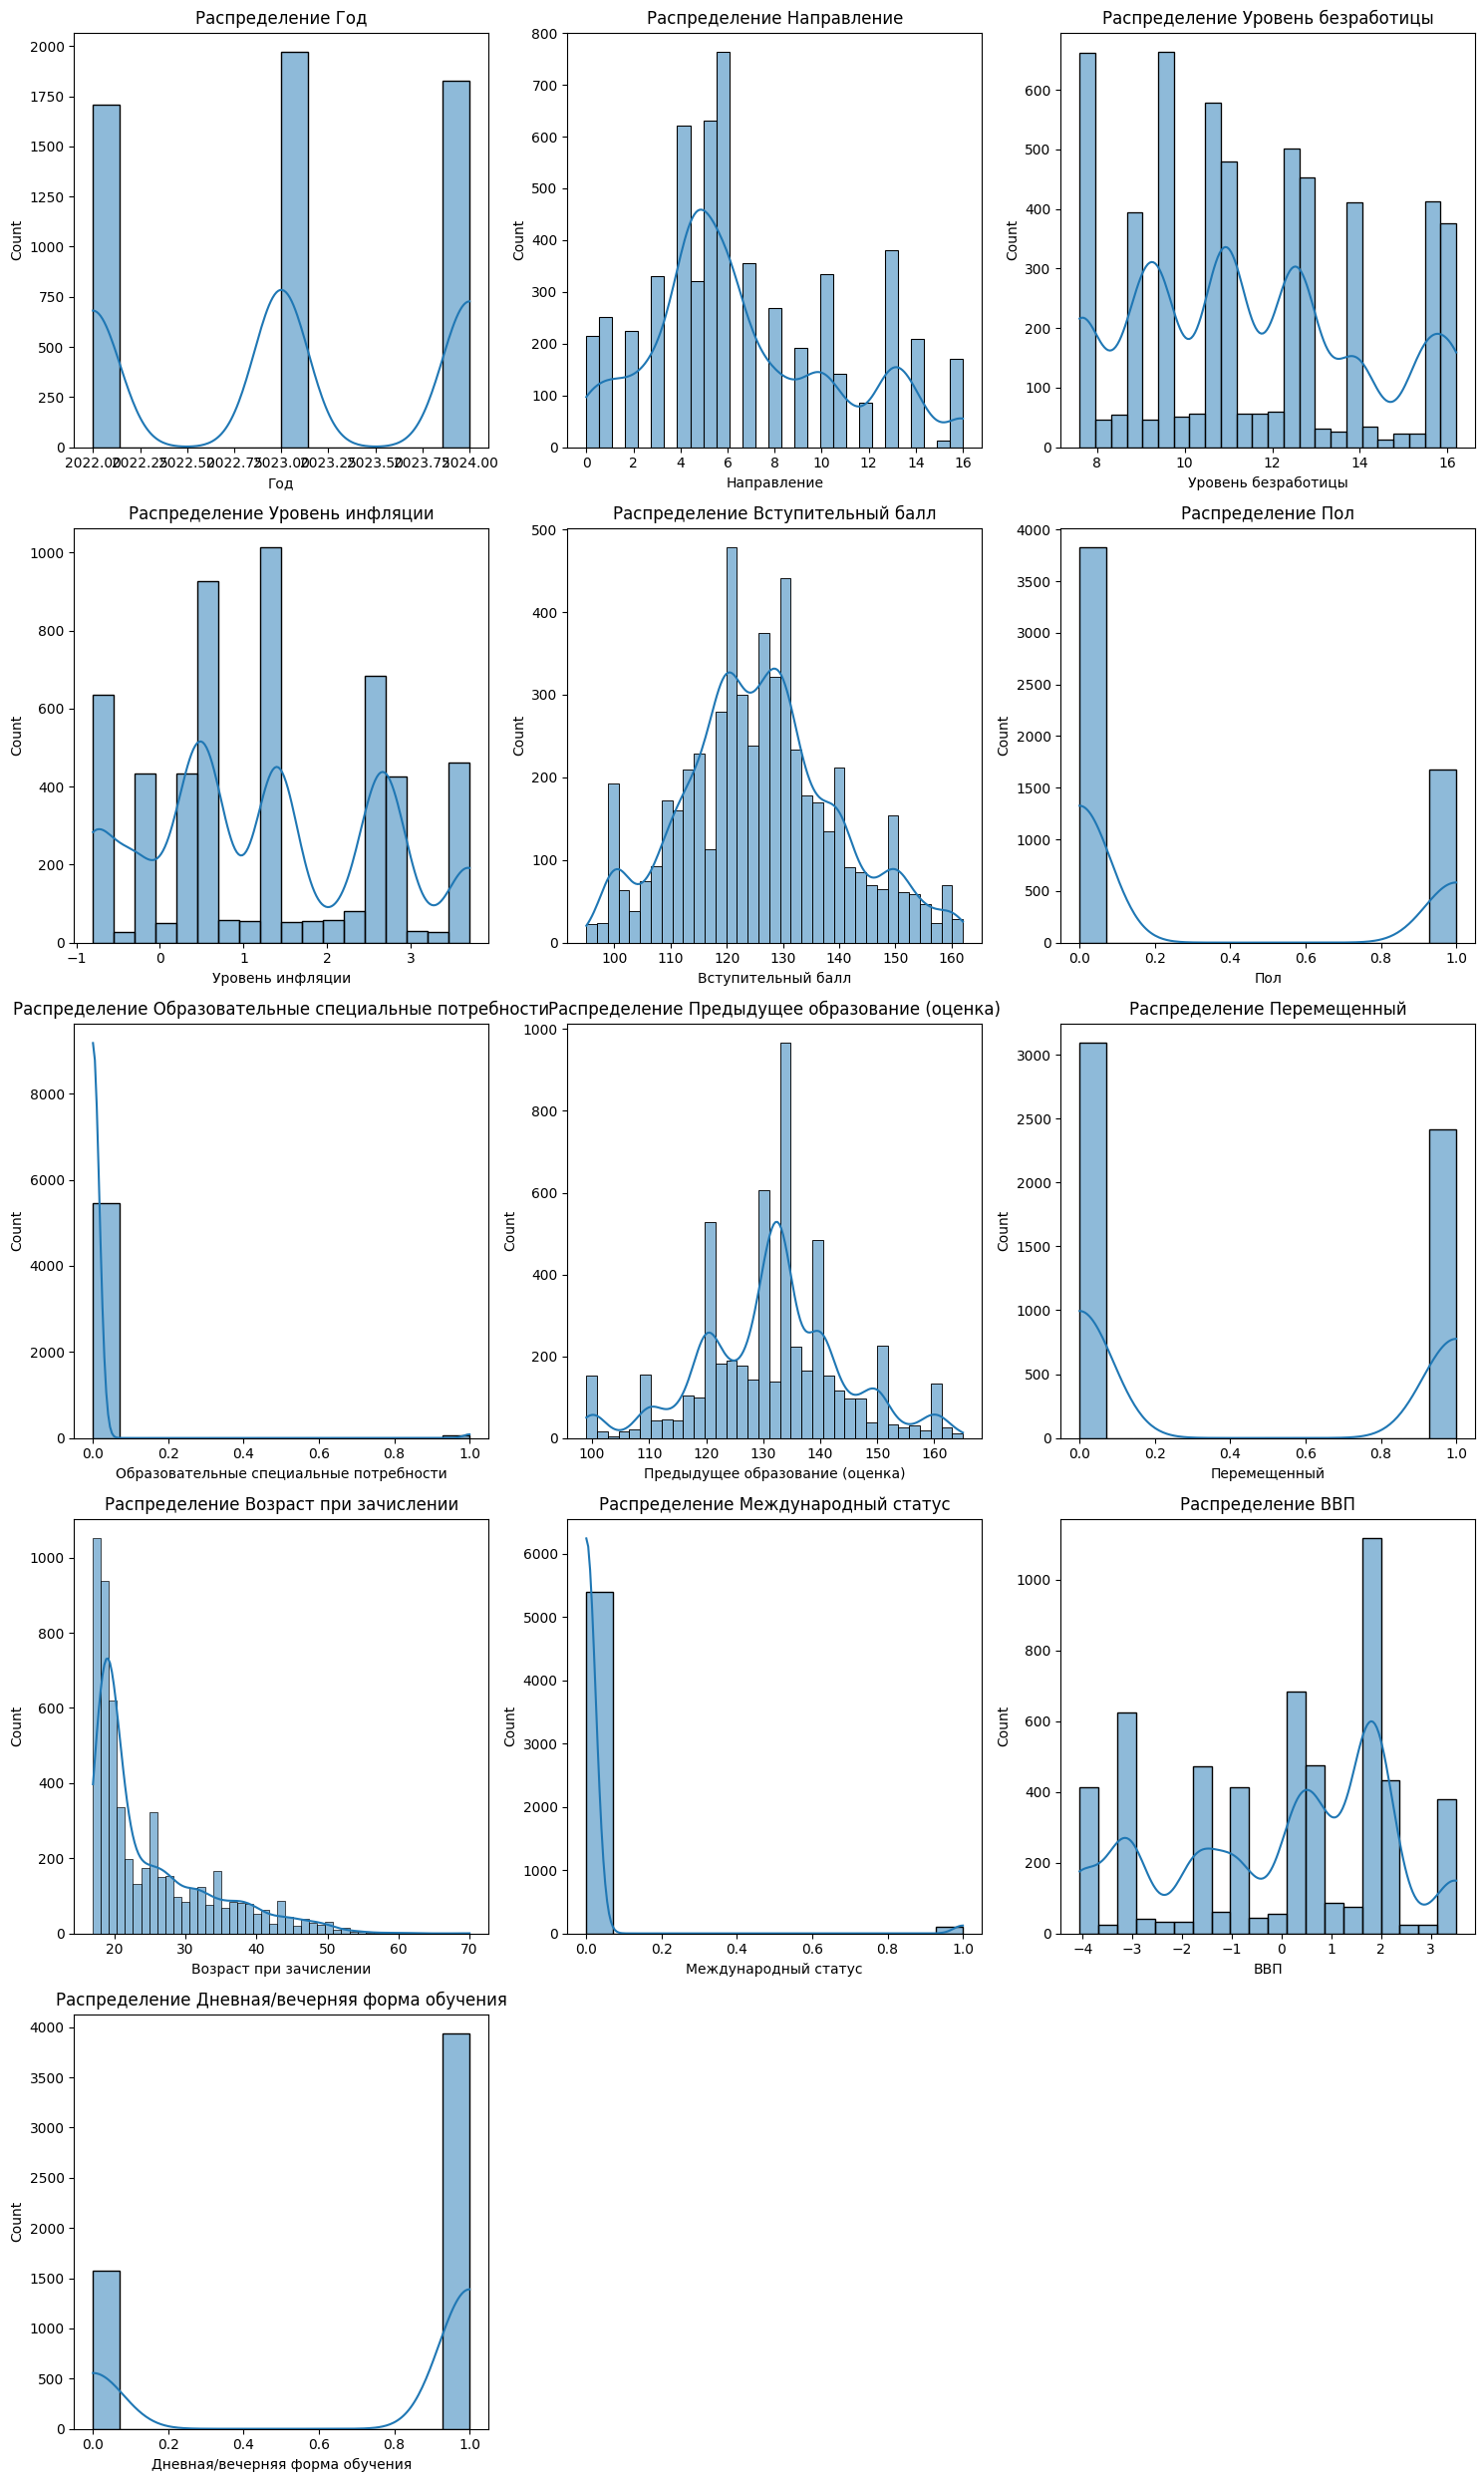

In [486]:
# Определение числовых колонок
numeric_columns = final_df.select_dtypes(include=[np.number]).columns.tolist()

# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(final_df[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

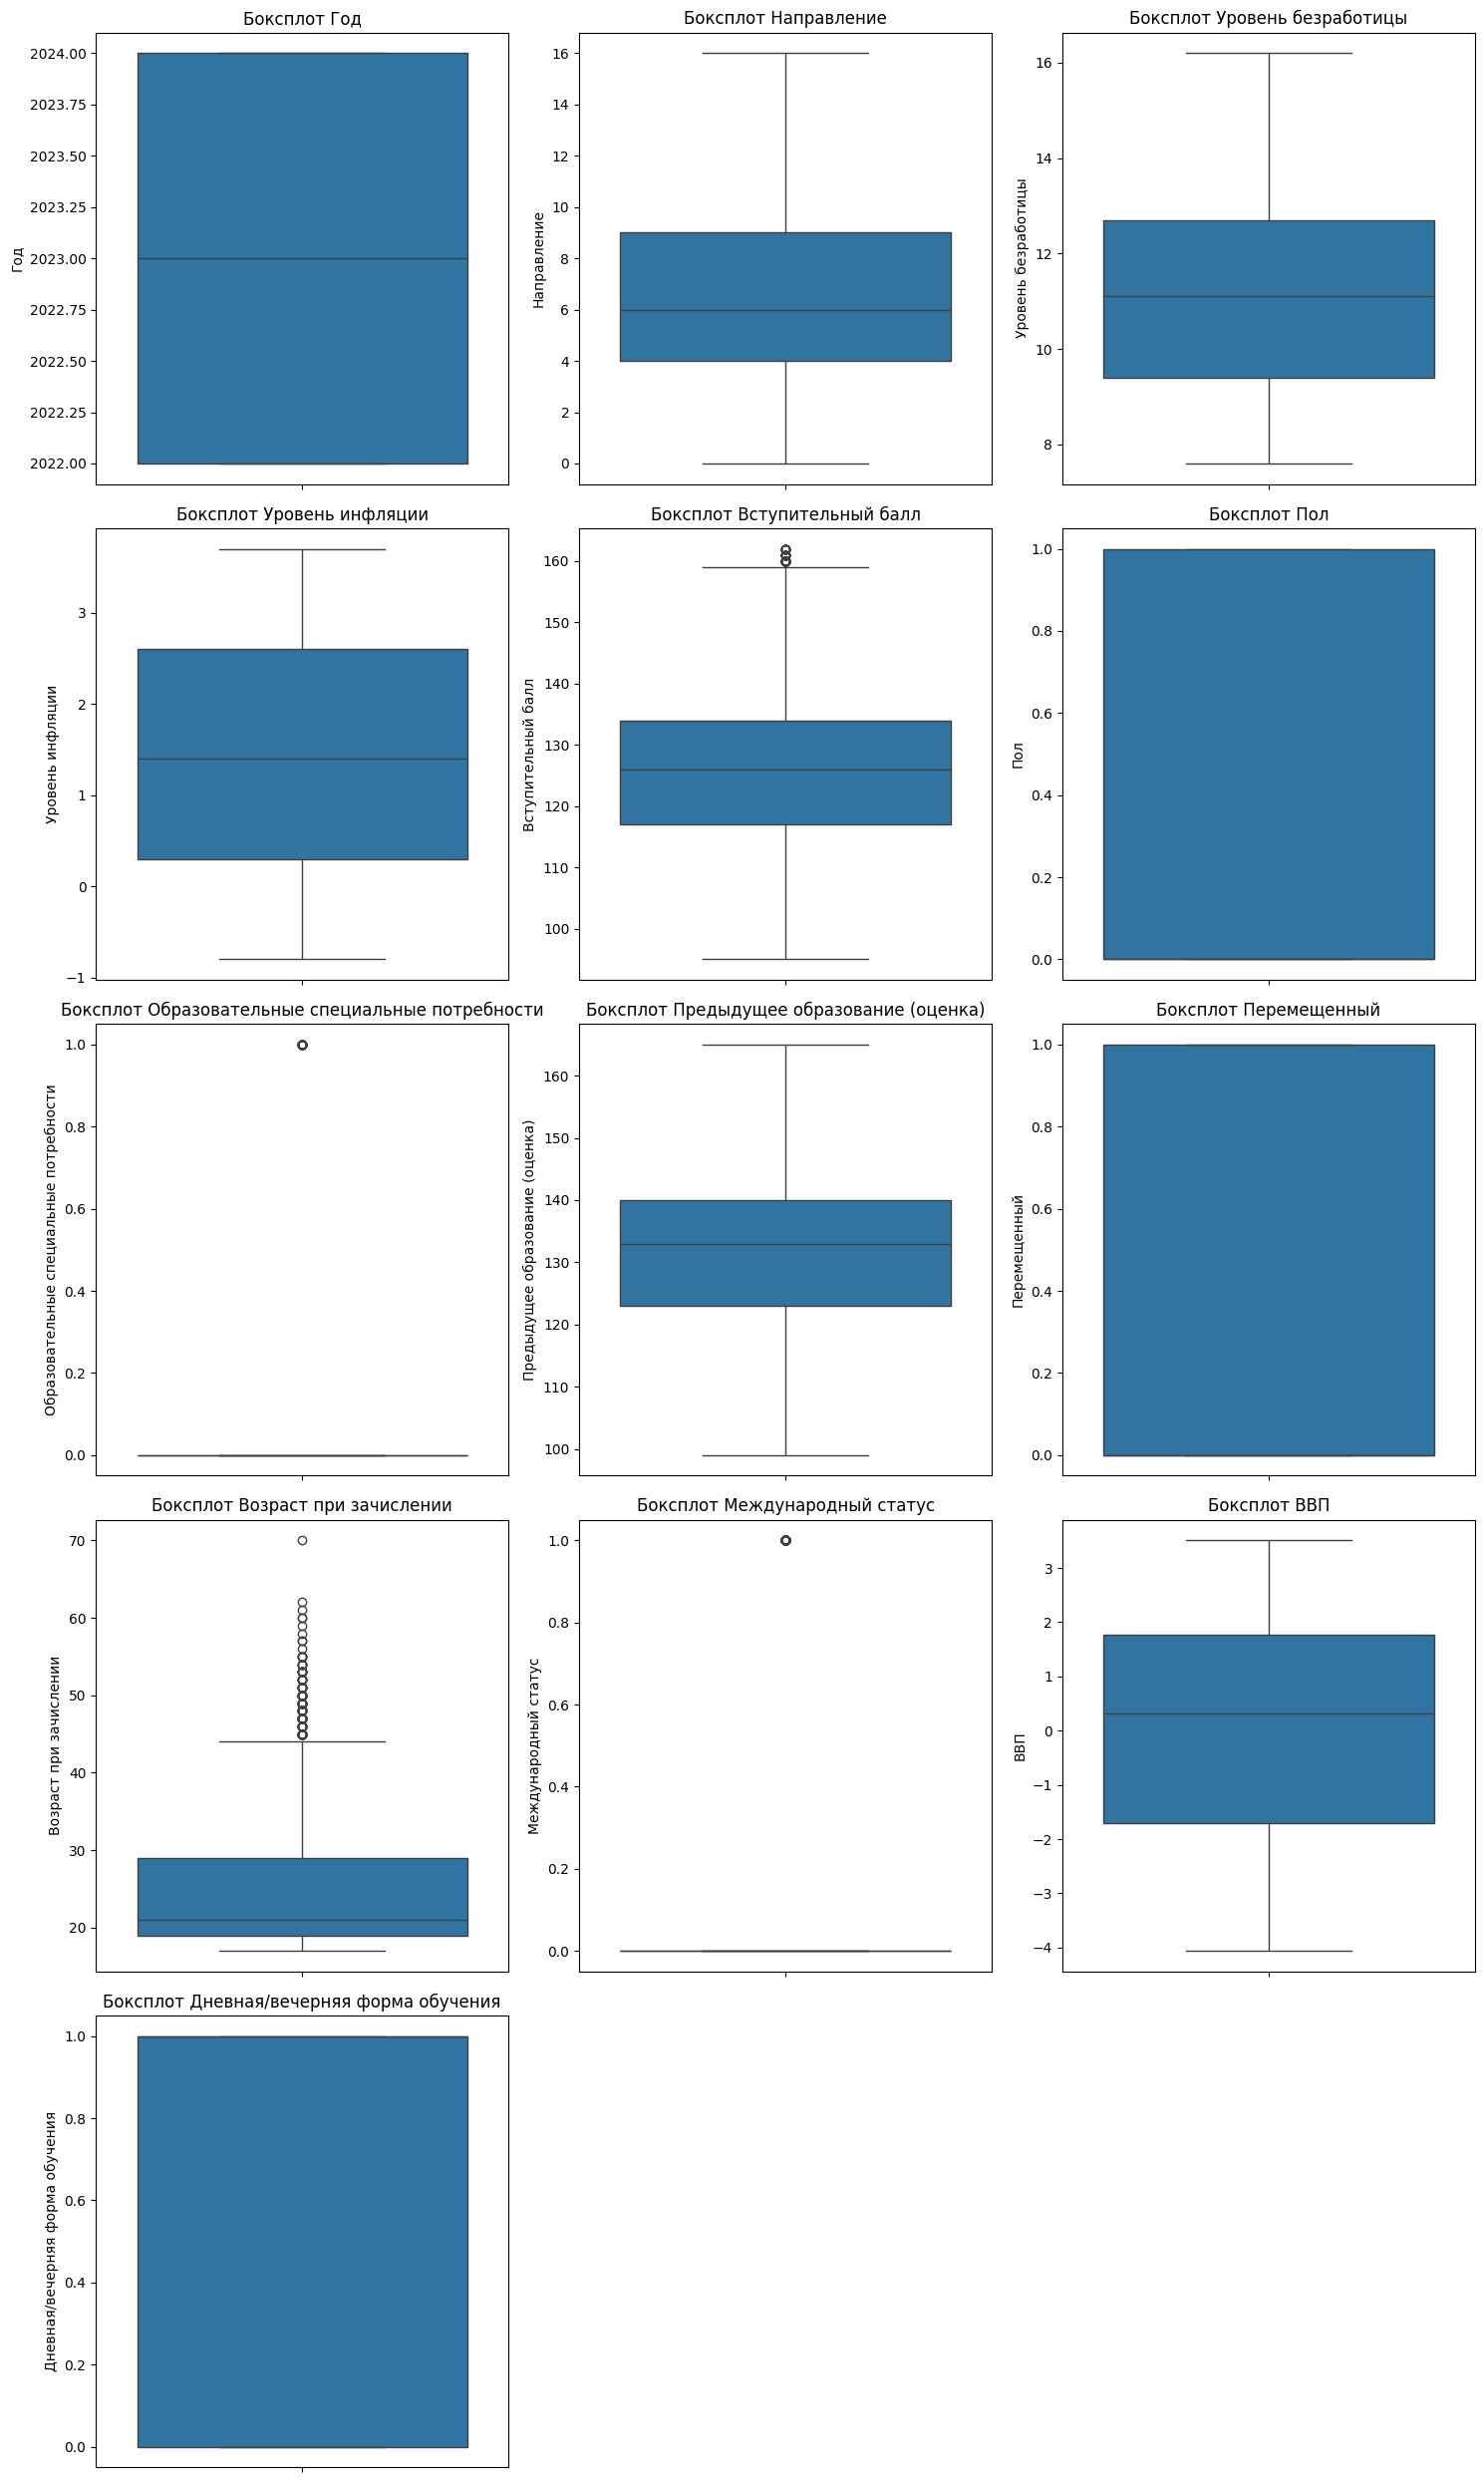

In [487]:
# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=final_df[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

In [488]:
def check_dataframe(df):
    # Проверка дубликатов
    duplicates = df.duplicated().sum()
    # Проверка отсутствующих значений
    missing_values = df.isnull().sum()
    # Общее количество строк и колонок
    num_rows, num_columns = df.shape
    # Типы данных колонок
    data_types = df.dtypes
    # Описание статистик по числовым колонкам
    statistics = df.describe()
    
    # Вывод результатов
    print(f"Количество строк: {num_rows}")
    print(f"Количество колонок: {num_columns}")
    print("\nТипы данных каждой колонки:")
    print(data_types)
    print("\nКоличество дубликатов:")
    print(duplicates)
    print("\nКоличество отсутствующих значений:")
    print(missing_values)
    print("\nСтатистическое описание числовых колонок:")
    print(statistics)


check_dataframe(final_df)

Количество строк: 5506
Количество колонок: 14

Типы данных каждой колонки:
Год                                         float64
Направление                                 float64
Уровень безработицы                         float64
Уровень инфляции                            float64
Вступительный балл                          float64
Пол                                           int64
Образовательные специальные потребности       int64
Предыдущее образование (оценка)             float64
Перемещенный                                  int64
Возраст при зачислении                        int64
Международный статус                          int64
ВВП                                         float64
Дневная/вечерняя форма обучения               int64
Возраст группа                             category
dtype: object

Количество дубликатов:
49

Количество отсутствующих значений:
Год                                         0
Направление                                 0
Уровень безработицы         

In [521]:
final_df

,Год,Направление,Уровень безработицы,Уровень инфляции,Вступительный балл,Пол,Образовательные специальные потребности,Предыдущее образование (оценка),Перемещенный,Возраст при зачислении,Международный статус,ВВП,Дневная/вечерняя форма обучения,Возраст группа,Возраст код
0,2022.0,0.000000,10.8,1.4,127.0,1,0,122.0,1,20,0,1.74,1,21-25,1
1,2023.0,1.000000,13.9,-0.3,142.0,1,0,160.0,1,19,0,0.79,1,16-20,0
2,2024.0,2.000000,10.8,1.4,125.0,1,0,122.0,1,19,0,1.74,1,16-20,0
3,2022.0,3.000000,9.4,-0.8,120.0,0,0,122.0,1,20,0,-3.12,1,21-25,1
4,2022.0,6.000000,15.5,2.8,128.0,0,0,142.0,1,18,0,-4.06,1,16-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,2024.0,5.000000,7.6,2.6,117.0,0,0,133.0,1,39,0,0.32,0,36-70,4
5502,2024.0,4.000000,9.4,-0.8,100.0,0,0,133.0,0,36,0,-3.12,0,36-70,4
5503,2022.0,5.000000,12.7,3.7,160.0,0,0,160.0,0,26,0,-1.70,0,26-30,2
5504,2023.0,4.000000,10.8,1.4,123.0,0,0,133.0,0,49,0,1.74,0,36-70,4


In [489]:
# Удаление дубликатов
final_df.drop_duplicates(inplace=True)
# Преобразование категориальных данных в числовые коды
final_df['Возраст код'] = final_df['Возраст группа'].cat.codes

In [502]:
# Исключение ненужных колонок
columns_to_exclude = ['Образовательные специальные потребности', 'Международный статус', 'Возраст при зачислении', 'Возраст группа']
df = final_df.drop(columns=columns_to_exclude)

In [503]:
df['Количество абитуриентов'] = df.groupby('Направление')['Направление'].transform('count')

Количество абитуриентов            1.000000
Перемещенный                       0.102188
Дневная/вечерняя форма обучения    0.099519
Предыдущее образование (оценка)    0.061516
Вступительный балл                 0.039935
Уровень безработицы                0.031198
Уровень инфляции                  -0.000823
Год                               -0.008522
ВВП                               -0.057546
Пол                               -0.073467
Направление                       -0.081021
Возраст код                       -0.124739
Name: Количество абитуриентов, dtype: float64


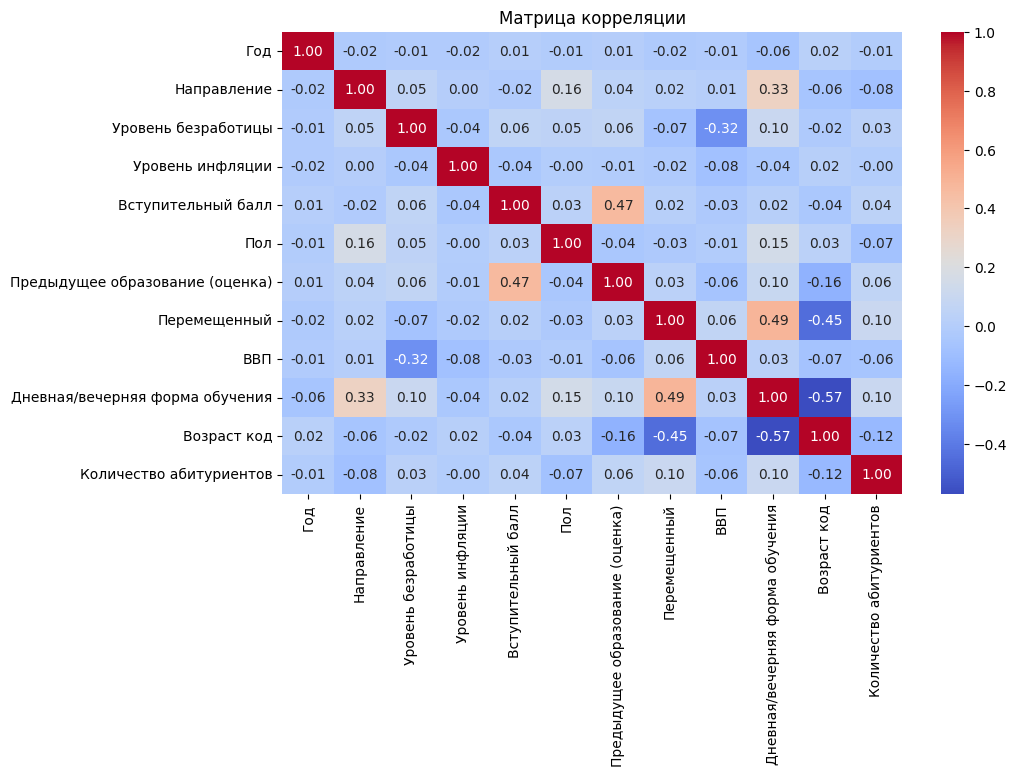

In [504]:
# Анализ корреляции с целевой переменной
correlation_matrix = df.corr()
print(correlation_matrix['Количество абитуриентов'].sort_values(ascending=False))

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

Количество абитуриентов:
Перемещенный: 0.1
Дневная/вечерняя форма: 0.09
Оценка: 0.06
вступительный балл: 0.04


In [507]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Определение зависимой и независимых переменных
X = df.drop(columns=['Количество абитуриентов'])
y = df['Количество абитуриентов']

# Добавление константы для свободного члена
X = sm.add_constant(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели
model = sm.OLS(y_train, X_train).fit()

# Оценка модели
print(model.summary())

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вывод предсказанных значений
print("Предсказанные значения:", y_pred)

                               OLS Regression Results                              
Dep. Variable:     Количество абитуриентов   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                  0.038
Method:                      Least Squares   F-statistic:                     16.51
Date:                     Sun, 26 Jan 2025   Prob (F-statistic):           2.47e-32
Time:                             21:15:54   Log-Likelihood:                -29673.
No. Observations:                     4365   AIC:                         5.937e+04
Df Residuals:                         4353   BIC:                         5.945e+04
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Наиболее значимые факторы для выбора направления:
Дневная/вечерняя форма обучения
Пол
Возраст 
Перемещенный

Коэффициенты линейной регрессии:
Год                                -1.463516
Направление                        -5.782639
Уровень безработицы                 0.793731
Уровень инфляции                    0.150817
Вступительный балл                  0.317665
Пол                               -32.136793
Предыдущее образование (оценка)     0.529728
Перемещенный                       15.752950
ВВП                                -6.119771
Дневная/вечерняя форма обучения    43.865306
Возраст код                        -9.378772
dtype: float64


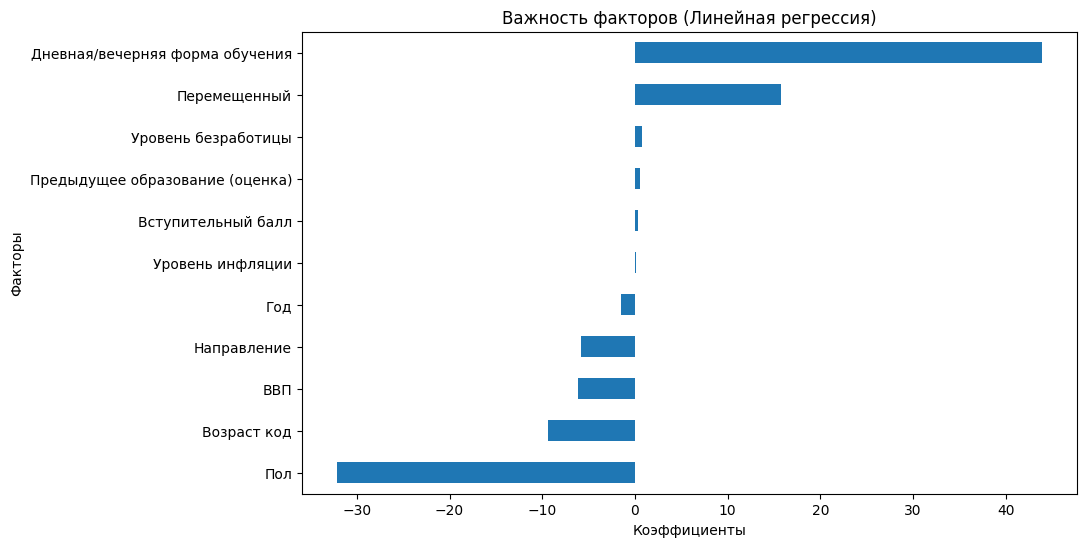

In [ ]:
from sklearn.linear_model import LinearRegression
# Определение целевой переменной и факторов
X = df.drop(columns=['Количество абитуриентов'])
y = df['Количество абитуриентов'] 

# Обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X, y)

# Коэффициенты модели
coeff = pd.Series(linear_model.coef_, index=X.columns)
print("Коэффициенты линейной регрессии:")
print(coeff)

# Визуализация важности факторов
plt.figure(figsize=(10,6))
coeff.sort_values().plot(kind='barh')
plt.title('Важность факторов (Линейная регрессия)')
plt.xlabel('Коэффициенты')
plt.ylabel('Факторы')
plt.show()

Важность факторов (Случайный лес):
Пол                                0.041063
Возраст код                        0.076111
Дневная/вечерняя форма обучения    0.037240
Перемещенный                       0.038129
Вступительный балл                 0.272154
Уровень безработицы                0.101280
Уровень инфляции                   0.092152
Предыдущее образование (оценка)    0.237920
ВВП                                0.103950
dtype: float64


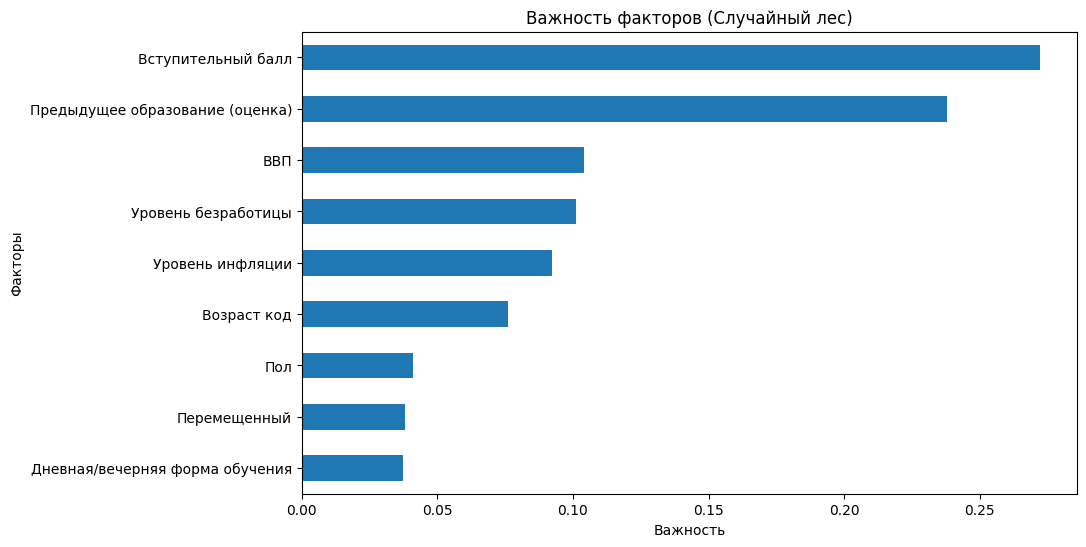

In [511]:
from sklearn.ensemble import RandomForestRegressor

X = df[['Пол', 'Возраст код', 'Дневная/вечерняя форма обучения', 
               'Перемещенный', 'Вступительный балл', 'Уровень безработицы', 'Уровень инфляции',
                 'Предыдущее образование (оценка)', 'ВВП']]
y = df['Количество абитуриентов'] 

# Обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

# Важность признаков
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Важность факторов (Случайный лес):")
print(importances)

# Визуализация важности факторов
plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh')
plt.title('Важность факторов (Случайный лес)')
plt.xlabel('Важность')
plt.ylabel('Факторы')
plt.show()

Важность факторов (Градиентный бустинг):
Пол                                0.106398
Возраст код                        0.157346
Дневная/вечерняя форма обучения    0.062720
Перемещенный                       0.034377
Вступительный балл                 0.211591
Уровень безработицы                0.056060
Уровень инфляции                   0.109176
Предыдущее образование (оценка)    0.146157
ВВП                                0.116175
dtype: float64


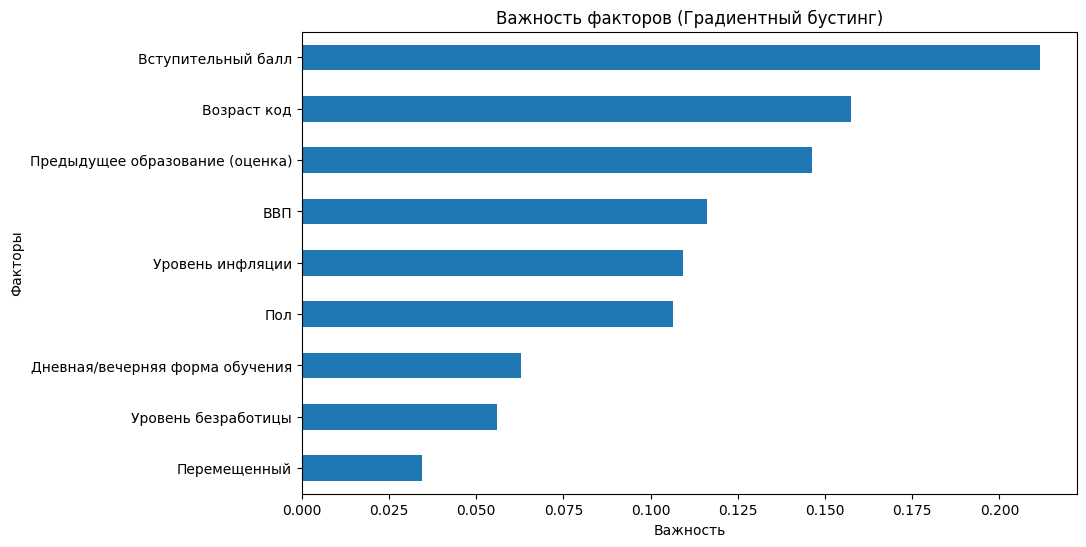

In [512]:
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X, y)

# Важность признаков
importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns)
print("Важность факторов (Градиентный бустинг):")
print(importances_gb)
# Визуализация важности факторов
plt.figure(figsize=(10,6))
importances_gb.sort_values().plot(kind='barh')
plt.title('Важность факторов (Градиентный бустинг)')
plt.xlabel('Важность')
plt.ylabel('Факторы')
plt.show()

In [513]:
from sklearn.linear_model import LassoCV

# Определение целевой переменной и факторов
X = df.drop(columns=['Количество абитуриентов'])
y = df['Количество абитуриентов'] 

# Обучение Lasso-регрессии с кросс-валидацией
lasso_model = LassoCV(cv=5)
lasso_model.fit(X, y)

# Вывод коэффициентов Lasso-регрессии
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print(lasso_coefficients[lasso_coefficients != 0])

Год                                -1.229064
Направление                        -5.747488
Уровень безработицы                 0.778981
Уровень инфляции                    0.045760
Вступительный балл                  0.314494
Пол                               -31.188123
Предыдущее образование (оценка)     0.532756
Перемещенный                       15.346112
ВВП                                -6.089463
Дневная/вечерняя форма обучения    42.644672
Возраст код                        -9.577983
dtype: float64


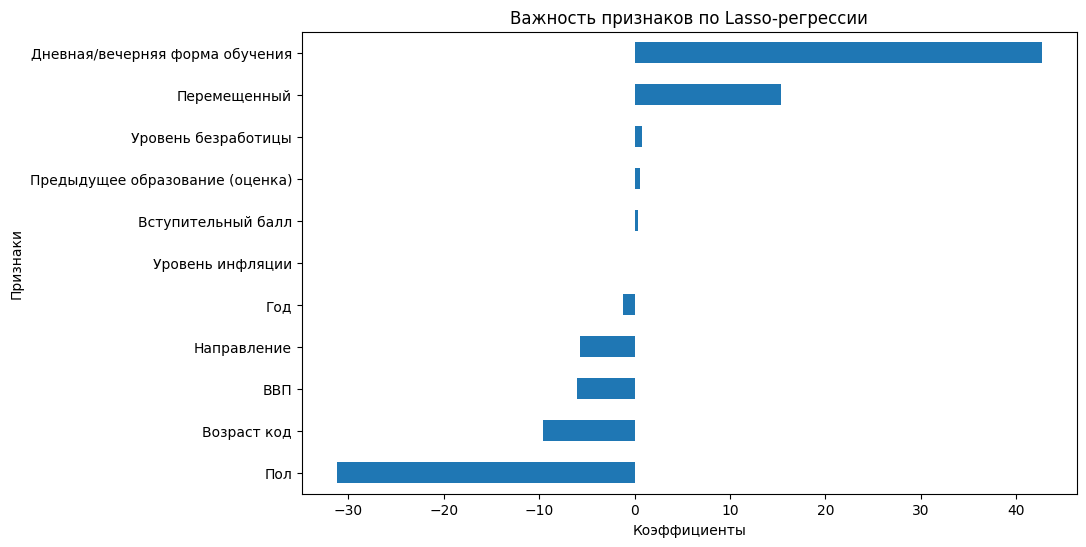

In [518]:
import matplotlib.pyplot as plt

# Создание DataFrame для визуализации
importance = pd.Series({
    'Год': -1.229064,
    'Направление': -5.747488,
    'Уровень безработицы': 0.778981,
    'Уровень инфляции': 0.045760,
    'Вступительный балл': 0.314494,
    'Пол': -31.188123,
    'Предыдущее образование (оценка)': 0.532756,
    'Перемещенный': 15.346112,
    'ВВП': -6.089463,
    'Дневная/вечерняя форма обучения': 42.644672,
    'Возраст код': -9.577983
})

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
importance.sort_values().plot(kind='barh')
plt.title('Важность признаков по Lasso-регрессии')
plt.xlabel('Коэффициенты')
plt.ylabel('Признаки')
plt.show()

1. Пол
2. Дневная/вечерняя форма обучения
3. Возраст 
4. Перемещенный

In [520]:
output_file_path = 'final.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')